### Initial Exploration: Listing Keys in All Raw Data Files

**Purpose:**
This script performs a preliminary check on all the `.mat` files downloaded into the `../data/raw/` directory. Its main goal is to list the internal "keys" available within each file. These keys are essential for knowing how to access the actual data arrays (like vibration signals, RPM, etc.) stored inside each `.mat` file.

**Inputs:**
* All `.mat` files present in the `../data/raw/` directory.

**Operations:**
1.  **Lists Files:** Uses `os.listdir()` to get a list of all filenames in the specified raw data directory.
2.  **Iterates Through Files:** Loops through each filename found.
3.  **Loads `.mat` File:** For each file, it constructs the full path and uses `scipy.io.loadmat()` to load its content.
4.  **Prints Keys:** After successfully loading a file, it prints:
    * The name of the file being processed.
    * A confirmation that the file was loaded.
    * The dictionary keys available within that `.mat` file (e.g., `__header__`, `__version__`, `__globals__`, and importantly, data keys like `X097_DE_time`, `X097RPM`, etc.).
5.  **Separates Output:** Prints a "=======================" line to visually separate the information for each file.

**Output & Interpretation:**
* The script produces a printed list, one section for each `.mat` file in the `../data/raw/` directory.
* Each section shows the filename and then lists all the internal variable names (keys) that can be used to access data within that file.
* **Key Insight:** This output is crucial for identifying the correct keys for Drive-End (`_DE_time`), Fan-End (`_FE_time`), Base Accelerometer (`_BA_time`), and RPM (`RPM`) data for each specific experiment file. This information is then used in subsequent scripts to extract the precise data needed for analysis and visualization. For example, it helps confirm that `Normal_0.mat` might contain a key like `X097_DE_time` for its drive-end vibration data.
* This step is a foundational part of data understanding, ensuring that we know how to correctly access the specific measurements from the dataset.

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the path to one of your data files
# This path is relative to where your notebook is (in the 'notebooks' folder)
files_path = '../data/raw'
files = os.listdir(files_path)
for file in files:
    print(f"Information for file: {file}")
    file_path = os.path.join(files_path, file)
    mat_data = scipy.io.loadmat(file_path)
    print(f"Successfully loaded: {file_path}")
    print("Keys in the .mat file:", mat_data.keys())
    print("=======================")

Information for file: B007_0.mat
Successfully loaded: ../data/raw\B007_0.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'X118_DE_time', 'X118_FE_time', 'X118_BA_time', 'X118RPM'])
Information for file: B007_1.mat
Successfully loaded: ../data/raw\B007_1.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'X119_DE_time', 'X119_FE_time', 'X119_BA_time', 'X119RPM'])
Information for file: B007_2.mat
Successfully loaded: ../data/raw\B007_2.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'X120_DE_time', 'X120_FE_time', 'X120_BA_time', 'X120RPM'])
Information for file: IR007_0.mat
Successfully loaded: ../data/raw\IR007_0.mat
Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'X105_DE_time', 'X105_FE_time', 'X105_BA_time', 'X105RPM'])
Information for file: IR007_1.mat
Successfully loaded: ../data/raw\IR007_1.mat
Keys in the .mat file: dict_keys(['__header__', '__version_

# Data Statistics

🔄 Loading CWRU Bearing Dataset...
Successfully loaded and processed: Normal_0.mat
Successfully loaded and processed: IR007_0.mat
Successfully loaded and processed: B007_0.mat
Successfully loaded and processed: OR007@6_0.mat
Info: Using expected_rpm (1772) for Normal_1.mat.
Successfully loaded and processed: Normal_1.mat
Successfully loaded and processed: IR007_1.mat
Successfully loaded and processed: B007_1.mat
Successfully loaded and processed: OR007@6_1.mat
Info: Using expected_rpm (1750) for Normal_2.mat.
Successfully loaded and processed: Normal_2.mat
Successfully loaded and processed: IR007_2.mat
Successfully loaded and processed: B007_2.mat
Successfully loaded and processed: OR007@6_2.mat
✅ Successfully loaded 12 signals

         CWRU DATASET SUMMARY
Metric            Value                   
      Total Files                       12
      Fault Types 4 (Normal, IRF, BF, ORF)
  Load Conditions        3 (0, 1, 2, 3 HP)
Total Data Points                2,309,660
    Sampling Rate

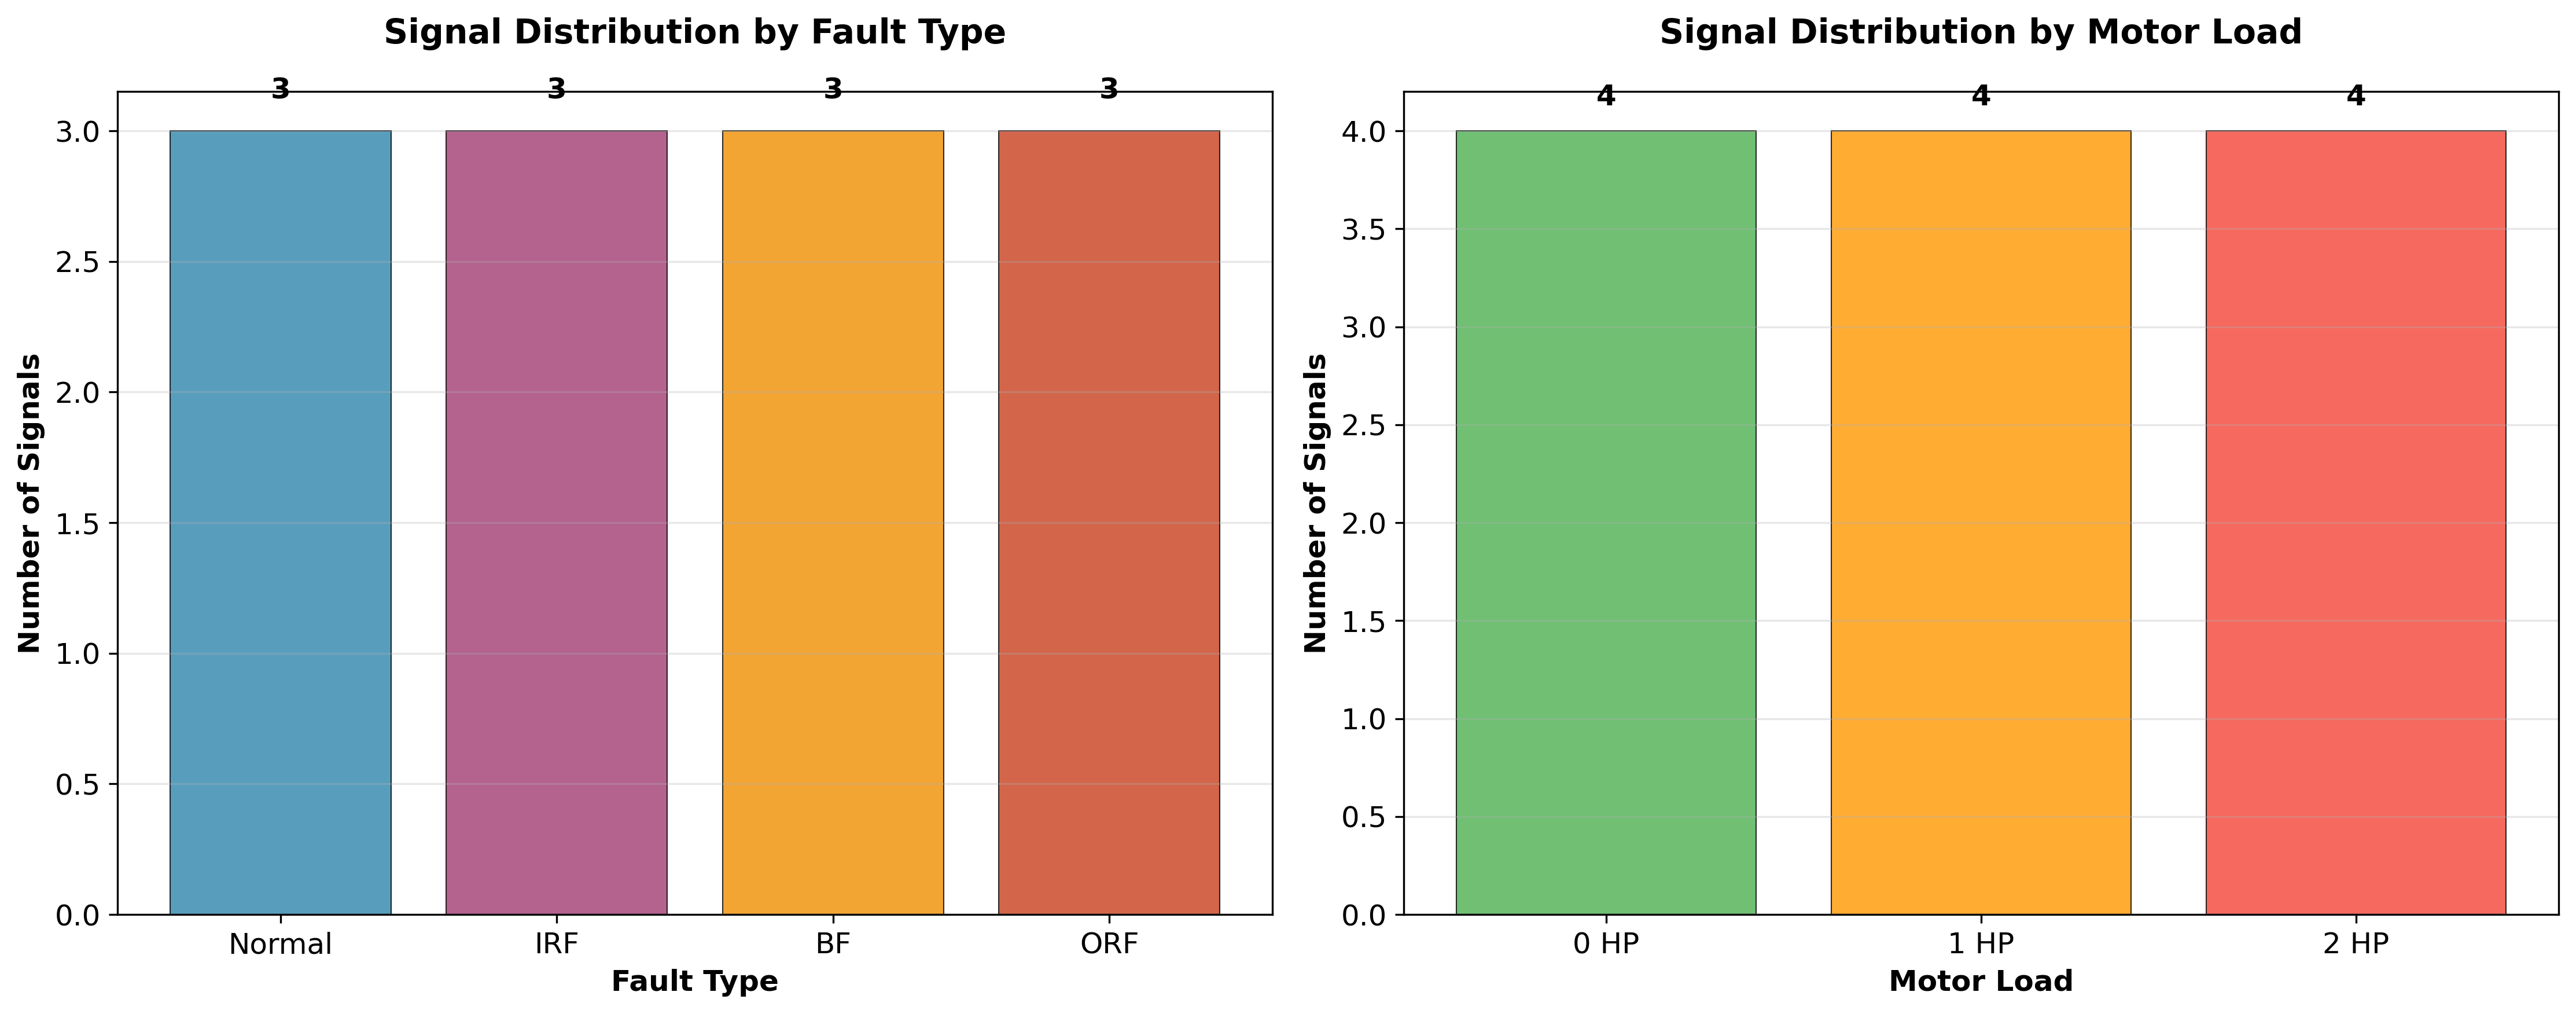

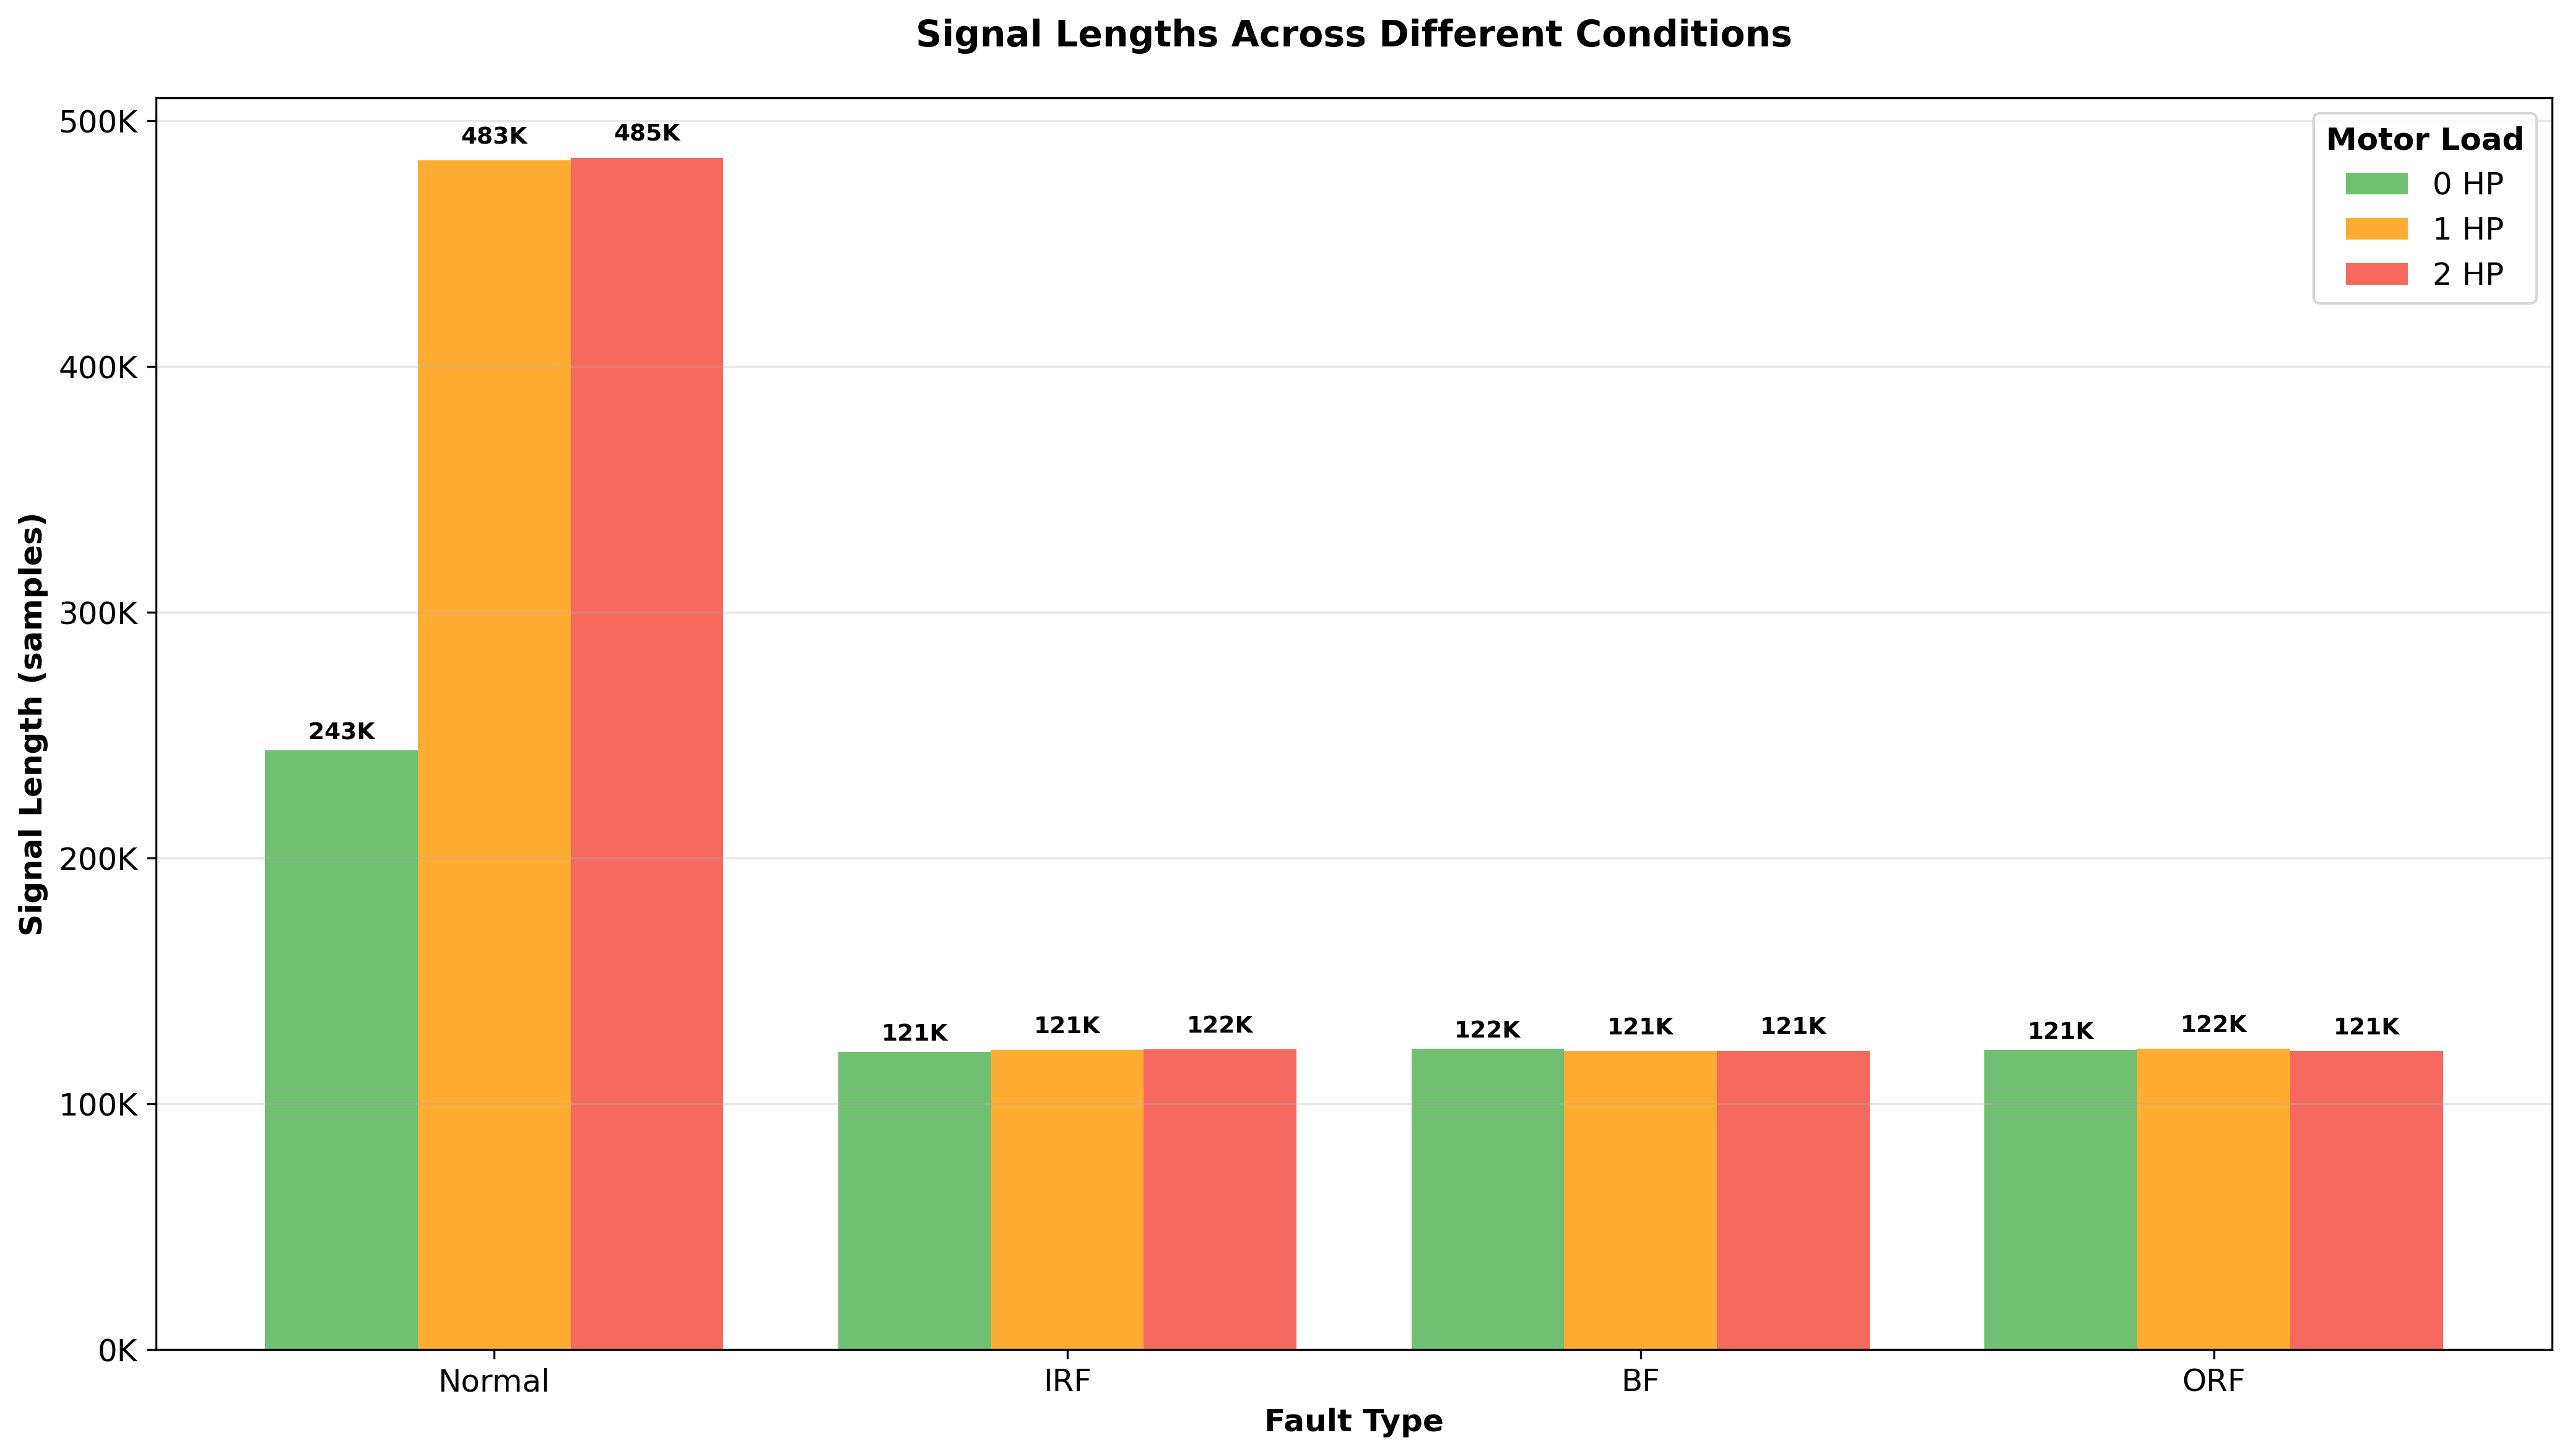


                    SIGNAL SPECIFICATIONS
Configuration  Fault  Load (HP)    RPM Samples  Duration (s)
   BF_0HP_007     BF          0 1796.0 122,571          10.2
   BF_1HP_007     BF          1 1772.0 121,410          10.1
   BF_2HP_007     BF          2 1748.0 121,556          10.1
  IRF_0HP_007    IRF          0 1797.0 121,265          10.1
  IRF_1HP_007    IRF          1 1772.0 121,991          10.2
  IRF_2HP_007    IRF          2 1748.0 122,136          10.2
   Normal_0HP Normal          0 1796.0 243,938          20.3
   Normal_1HP Normal          1 1772.0 483,903          40.3
   Normal_2HP Normal          2 1750.0 485,063          40.4
ORF_0HP_007_6    ORF          0 1796.0 121,991          10.2
ORF_1HP_007_6    ORF          1 1773.0 122,426          10.2
ORF_2HP_007_6    ORF          2 1750.0 121,410          10.1

                  KEY INSIGHTS
• Dataset contains 12 signals across 4 fault types and 3 load conditions
• Normal signals are ~3.3x longer than fault signals on ave

In [4]:
# Enhanced CWRU Bearing Dataset Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pathlib import Path

# Configuration
class Config:
    """Configuration settings for the analysis"""
    OUTPUT_DIR = Path('../figures')
    SAMPLING_RATE = 12000  # Hz
    DPI = 300
    FONT_SIZE = 12
    
    # Color schemes
    FAULT_COLORS = {
        'Normal': '#2E86AB',
        'IRF': '#A23B72', 
        'BF': '#F18F01',
        'ORF': '#C73E1D'
    }
    LOAD_COLORS = ['#4CAF50', '#FF9800', '#F44336']

def setup_environment():
    """Setup project environment and imports"""
    # Add project root to Python path
    project_root = Path.cwd().parent.resolve()
    if str(project_root) not in sys.path:
        sys.path.insert(0, str(project_root))
    
    try:
        from src.data_utils import load_and_label_data, SIGNAL_CONFIGURATIONS
        return load_and_label_data, SIGNAL_CONFIGURATIONS
    except ImportError as e:
        print(f"❌ Error importing from src.data_utils: {e}")
        raise

def setup_plotting():
    """Configure matplotlib for high-quality plots"""
    plt.style.use('default')  # Reset to default style
    plt.rcParams.update({
        'figure.dpi': Config.DPI,
        'savefig.dpi': Config.DPI,
        'font.size': Config.FONT_SIZE,
        'axes.labelweight': 'bold',
        'axes.titleweight': 'bold',
        'figure.facecolor': 'white',
        'axes.facecolor': 'white'
    })

def create_dataset_summary(df):
    """Generate and display dataset summary statistics"""
    print("\n" + "="*50)
    print("         CWRU DATASET SUMMARY")
    print("="*50)
    
    summary_data = {
        'Metric': [
            'Total Files',
            'Fault Types', 
            'Load Conditions',
            'Total Data Points',
            'Sampling Rate',
            'Total Duration'
        ],
        'Value': [
            f"{len(df)}",
            f"{df['fault_type'].nunique()} (Normal, IRF, BF, ORF)",
            f"{df['motor_load_hp'].nunique()} (0, 1, 2, 3 HP)",
            f"{df['signal_length'].sum():,}",
            f"{Config.SAMPLING_RATE:,} Hz",
            f"{df['signal_length'].sum() / Config.SAMPLING_RATE / 60:.1f} minutes"
        ]
    }
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False, justify='left'))
    print("="*50)
    
    return summary_df

def plot_signal_distribution(df):
    """Create distribution plots for fault types and motor loads"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Distribution by Fault Type
    fault_counts = df['fault_type'].value_counts()
    fault_colors = [Config.FAULT_COLORS.get(fault, '#gray') for fault in fault_counts.index]
    
    bars1 = ax1.bar(fault_counts.index, fault_counts.values, 
                    color=fault_colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    ax1.set_title('Signal Distribution by Fault Type', fontsize=14, pad=20)
    ax1.set_ylabel('Number of Signals')
    ax1.set_xlabel('Fault Type')
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    # Distribution by Motor Load
    load_counts = df['motor_load_hp'].value_counts().sort_index()
    bars2 = ax2.bar([f'{x} HP' for x in load_counts.index], load_counts.values, 
                    color=Config.LOAD_COLORS[:len(load_counts)], alpha=0.8, 
                    edgecolor='black', linewidth=0.5)
    ax2.set_title('Signal Distribution by Motor Load', fontsize=14, pad=20)
    ax2.set_ylabel('Number of Signals')
    ax2.set_xlabel('Motor Load')
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    save_figure(fig, 'Dataset_Distribution.png')
    plt.show()

def plot_signal_lengths(df):
    """Create detailed signal length comparison plot"""
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    fault_types = df['fault_type'].unique()
    loads = sorted(df['motor_load_hp'].unique())
    
    x = np.arange(len(fault_types))
    width = 0.8 / len(loads)  # Dynamic width based on number of loads
    
    for i, load in enumerate(loads):
        lengths = []
        for fault in fault_types:
            subset = df[(df['fault_type'] == fault) & (df['motor_load_hp'] == load)]
            if not subset.empty:
                lengths.append(subset['signal_length'].iloc[0])
            else:
                lengths.append(0)
        
        offset = (i - len(loads)/2 + 0.5) * width
        bars = ax.bar(x + offset, lengths, width, 
                     label=f'{load} HP', alpha=0.8, 
                     color=Config.LOAD_COLORS[i % len(Config.LOAD_COLORS)])
        
        # Add value labels on bars
        for j, bar in enumerate(bars):
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height + max(lengths)*0.01,
                       f'{int(height/1000)}K', ha='center', va='bottom', 
                       fontsize=9, fontweight='bold')
    
    ax.set_xlabel('Fault Type')
    ax.set_ylabel('Signal Length (samples)')
    ax.set_title('Signal Lengths Across Different Conditions', fontsize=14, pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(fault_types)
    
    # Fix the legend issue
    legend = ax.legend(title='Motor Load', loc='upper right')
    legend.get_title().set_fontweight('bold')
    
    ax.grid(True, alpha=0.3, axis='y')
    
    # Format y-axis to show values in thousands
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    
    plt.tight_layout()
    save_figure(fig, 'Signal_Length_Comparison.png')
    plt.show()

def display_signal_specifications(df):
    """Display detailed signal specifications table"""
    print("\n" + "="*85)
    print("                    SIGNAL SPECIFICATIONS")
    print("="*85)
    
    # Create specifications dataframe
    specs_df = df.copy()
    specs_df['Duration (sec)'] = (specs_df['signal_length'] / Config.SAMPLING_RATE).round(1)
    
    # Select and rename columns
    display_cols = ['config_name', 'fault_type', 'motor_load_hp', 'rpm', 'signal_length', 'Duration (sec)']
    specs_df = specs_df[display_cols].copy()
    specs_df.columns = ['Configuration', 'Fault', 'Load (HP)', 'RPM', 'Samples', 'Duration (s)']
    
    # Sort for better readability
    specs_df = specs_df.sort_values(['Fault', 'Load (HP)']).reset_index(drop=True)
    
    # Format the samples column for better readability
    specs_df['Samples'] = specs_df['Samples'].apply(lambda x: f"{x:,}")
    
    print(specs_df.to_string(index=False))
    print("="*85)

def generate_insights(df):
    """Generate and display key insights from the dataset"""
    print("\n" + "="*60)
    print("                  KEY INSIGHTS")
    print("="*60)
    
    # Calculate statistics
    normal_signals = df[df['fault_type'] == 'Normal']
    fault_signals = df[df['fault_type'] != 'Normal']
    
    if not normal_signals.empty and not fault_signals.empty:
        normal_avg = normal_signals['signal_length'].mean()
        fault_avg = fault_signals['signal_length'].mean()
        length_ratio = normal_avg / fault_avg
    else:
        length_ratio = 1.0
    
    total_duration = df['signal_length'].sum() / Config.SAMPLING_RATE
    unique_faults = df['fault_type'].nunique()
    unique_loads = df['motor_load_hp'].nunique()
    
    insights = [
        f"• Dataset contains {len(df)} signals across {unique_faults} fault types and {unique_loads} load conditions",
        f"• Normal signals are ~{length_ratio:.1f}x longer than fault signals on average",
        f"• RPM range: {df['rpm'].min():.0f} - {df['rpm'].max():.0f}",
        f"• Total recording time: {total_duration/60:.1f} minutes ({total_duration:.1f} seconds)",
        f"• Sampling rate: {Config.SAMPLING_RATE:,} Hz provides high temporal resolution",
        f"• Signal length variation: {df['signal_length'].min():,} - {df['signal_length'].max():,} samples"
    ]
    
    for insight in insights:
        print(insight)
    
    print("="*60)

def save_figure(fig, filename):
    """Save figure with consistent settings"""
    Config.OUTPUT_DIR.mkdir(exist_ok=True)
    filepath = Config.OUTPUT_DIR / filename
    fig.savefig(filepath, dpi=Config.DPI, bbox_inches='tight', 
                facecolor='white', edgecolor='none')

def main():
    """Main analysis function"""
    print("🔄 Loading CWRU Bearing Dataset...")
    
    # Setup environment
    load_and_label_data, _ = setup_environment()
    setup_plotting()
    
    # Load data
    raw_data_list = load_and_label_data()
    
    if not raw_data_list:
        print("❌ No data loaded. Cannot generate overview.")
        return
    
    # Create DataFrame and calculate signal lengths
    df = pd.DataFrame(raw_data_list)
    df['signal_length'] = df['signal'].apply(len)
    
    print(f"✅ Successfully loaded {len(df)} signals")
    
    # Generate analysis components
    try:
        create_dataset_summary(df)
        plot_signal_distribution(df)
        plot_signal_lengths(df)
        display_signal_specifications(df)
        generate_insights(df)
        
        print(f"\n📊 Figures saved to: {Config.OUTPUT_DIR.resolve()}")
        print("✅ Dataset overview complete - ready for presentation!")
        
    except Exception as e:
        print(f"❌ Error during analysis: {e}")
        raise
    finally:
        # Reset matplotlib parameters
        plt.rcdefaults()

# Execute the analysis
if __name__ == "__main__":
    main()
else:
    # If running in notebook, execute directly
    main()

### Analysis of a Single Bearing Signal File

**Purpose:**
This script is designed for initial inspection and visualization of a single raw vibration signal from a CWRU bearing `.mat` file. Its goal is to help understand the basic characteristics of the signal and to visually check for any obvious patterns or anomalies at different points in the recording.

**Inputs:**
* `file_name`: The name of the `.mat` file to be analyzed (e.g., `'Normal_0.mat'`). This file should be located in the `../data/raw/` directory.
* `signal_key_for_file`: The specific key within the `.mat` file that contains the Drive-End (DE) time-series vibration data (e.g., `'X097_DE_time'`).

**Operations:**
1.  **Loads Data:** Uses `scipy.io.loadmat` to load the specified `.mat` file.
2.  **Extracts Signal:** Accesses the vibration data array using the provided `signal_key_for_file` and flattens it into a 1D NumPy array.
3.  **Prints Metadata:** Displays basic information about the loaded signal, including its total length (number of samples), data type, and the first and last 10 sample values.
4.  **Visualizes Segments:** Generates three separate plots using `matplotlib.pyplot`:
    * A segment from the **start** of the signal.
    * A segment from the **middle** of the signal.
    * A segment from the **end** of the signal.
    The number of samples in each plotted segment is controlled by the `samples_to_plot` variable.

**Output & Interpretation:**
* The script prints confirmation of file loading and signal properties.
* It displays three line plots. Each plot shows the amplitude of the vibration signal over the sample index for the respective segment (start, middle, end).
* These plots allow for a visual assessment of:
    * The general waveform and amplitude range of the signal.
    * Any noticeable repetitive patterns, spikes, or transients.
    * Whether the signal characteristics appear consistent or change significantly across the duration of the recording.
* This initial visual check is useful for verifying data integrity and getting a first feel for what a "normal" or a specific "faulty" signal looks like before more complex processing.

Successfully loaded: Normal_0.mat
Using signal key: X097_DE_time
Signal length: 243938 samples
Signal data type: float64
First 10 samples: [ 0.05319692  0.08866154  0.09971815  0.05862092 -0.00458954 -0.056952
 -0.07176369 -0.05862092 -0.04652123 -0.04985908]
Last 10 samples: [ 0.07468431  0.10013538  0.09325108  0.046104   -0.01919262 -0.059664
 -0.06383631 -0.03463015  0.01668923  0.04693846]


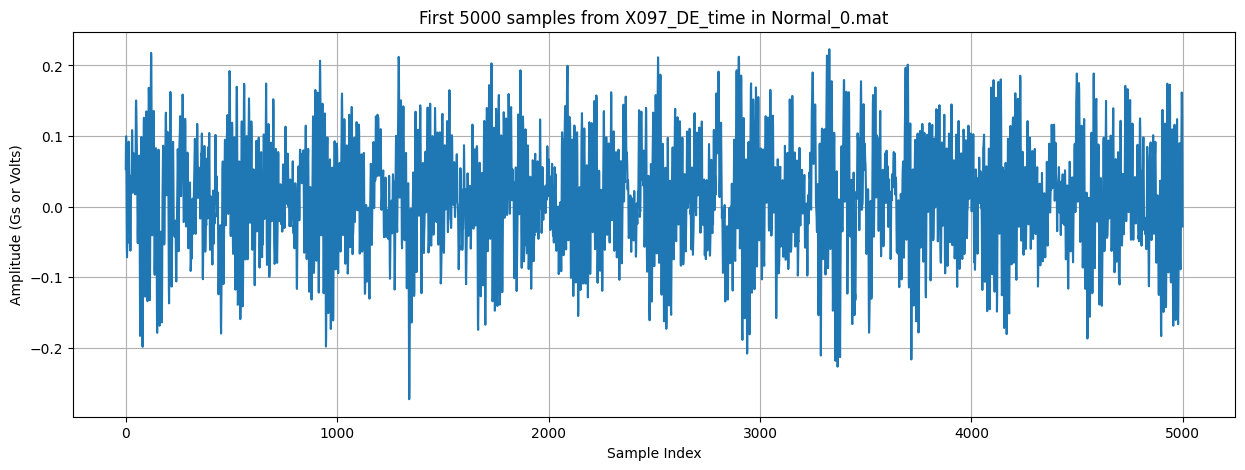

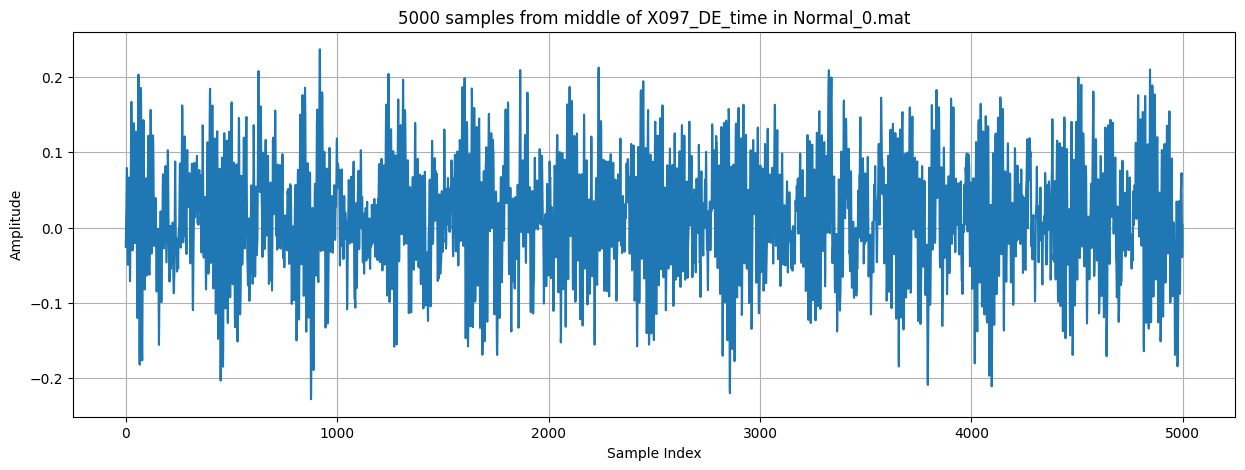

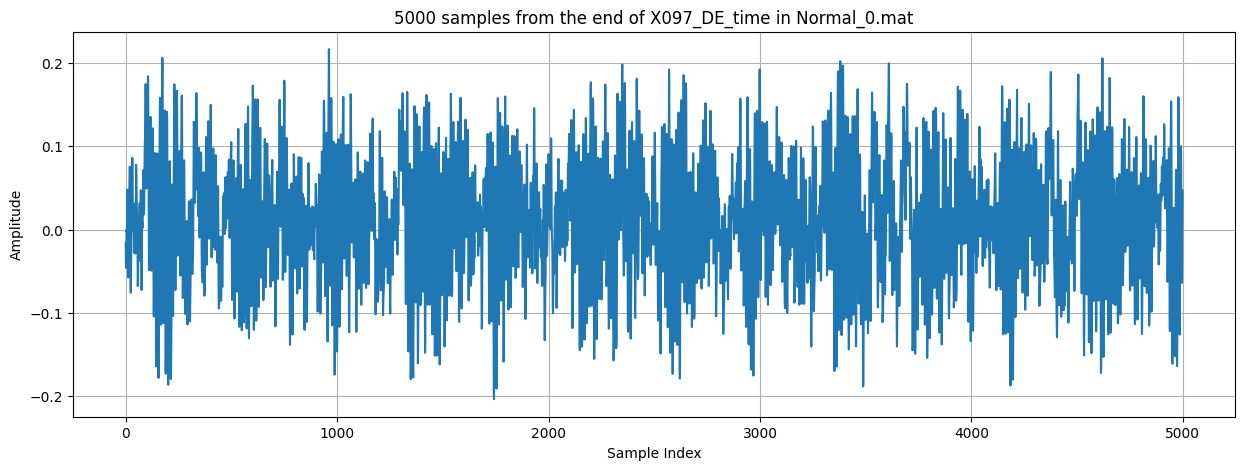

In [5]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the specific file and its known DE_time key
file_name = 'Normal_0.mat'
# From the output, the key for Normal_0.mat (97.mat) is X097_DE_time
# If you were loading B007_0.mat, the key would be 'X118_DE_time'
signal_key_for_file = 'X097_DE_time'

file_path = os.path.join('../data/raw', file_name)

try:
    mat_data = scipy.io.loadmat(file_path)
    print(f"Successfully loaded: {file_name}")
    
    # Check if the specific key exists
    if signal_key_for_file in mat_data:
        print(f"Using signal key: {signal_key_for_file}")
        # Extract the vibration signal and flatten it to a 1D array
        vibration_signal = mat_data[signal_key_for_file].flatten()
        
        print(f"Signal length: {len(vibration_signal)} samples")
        print(f"Signal data type: {vibration_signal.dtype}")
        print(f"First 10 samples: {vibration_signal[:10]}")
        print(f"Last 10 samples: {vibration_signal[-10:]}") # Good to check the end too

        # Plot the first N samples (e.g., 5000 or one full rotation if known)
        # CWRU data is often sampled at 12kHz. If motor speed is ~1797 RPM (Normal_0 data):
        # Samples per revolution = (12000 samples/sec) * (60 sec/min) / (1797 rev/min) ~= 400 samples/rev
        samples_to_plot = 5000 # You can adjust this
        
        plt.figure(figsize=(15, 5))
        plt.plot(vibration_signal[:samples_to_plot])
        plt.title(f"First {samples_to_plot} samples from {signal_key_for_file} in {file_name}")
        plt.xlabel("Sample Index")
        plt.ylabel("Amplitude (Gs or Volts)") # Check CWRU docs for units if needed
        plt.grid(True)
        plt.show()

        # plot a segment from the middle
        plt.figure(figsize=(15, 5))
        middle_point = len(vibration_signal) // 2
        plt.plot(vibration_signal[middle_point : middle_point + samples_to_plot])
        plt.title(f"{samples_to_plot} samples from middle of {signal_key_for_file} in {file_name}")
        plt.xlabel("Sample Index")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.show()

        # plot a segment from the end
        plt.figure(figsize=(15, 5))
        plt.plot(vibration_signal[-samples_to_plot:])
        plt.title(f"{samples_to_plot} samples from the end of {signal_key_for_file} in {file_name}")
        plt.xlabel("Sample Index")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.show()
        
    else:
        print(f"Error: Key '{signal_key_for_file}' not found in {file_name}.")
        print(f"Available keys are: {mat_data.keys()}")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


### Comprehensive Visualization of Bearing Signals Across Loads and Conditions

**Purpose:**
This script provides a compact and comprehensive visualization of vibration signals from the CWRU bearing dataset. It aims to compare different bearing health states (Normal, Inner Race Fault, Ball Fault, Outer Race Fault) across various operating (motor load) conditions by displaying key segments of their signals in a structured way.

**Inputs:**
* Pre-defined lists (`signals_to_compare_0HP`, `_1HP`, `_2HP`) specifying:
    * The `.mat` **filenames** for each bearing state and load condition.
    * The **signal keys** (e.g., `'X097_DE_time'`) to extract Drive-End vibration data.
    * The **RPM keys** (e.g., `'X097RPM'`) to extract motor speed, with fallbacks to estimated RPMs.
    * Descriptive **labels** for each signal.
* All specified `.mat` files are expected to be in the `../data/raw/` directory.
* `SAMPLING_RATE`: The sampling frequency of the data (e.g., 12000 Hz).

**Operations:**
1.  **Data Definition:** Organizes file information for 0 HP, 1 HP, and 2 HP load conditions.
2.  **Signal Loading:**
    * Iterates through each defined load condition (0HP, 1HP, 2HP).
    * For each load, it attempts to load the raw vibration signal and RPM for all four bearing states (Normal, IRF, BF, ORF) using a helper function (`load_signal_and_rpm`).
    * Calculates `samples_per_rev` (samples per revolution) for each signal dynamically based on its loaded RPM and the `SAMPLING_RATE`. This aims to display approximately one revolution of the shaft in the plots.
3.  **Plot Generation (`create_compact_load_comparison_figure` function):**
    * For each load condition (if all its four signals are successfully loaded), this function generates **one single figure**.
    * This figure contains a **3x4 grid of subplots** (12 subplots in total):
        * **Rows (3):** Represent signal segments from the "Start", "Middle", and "End" of the recording.
        * **Columns (4):** Represent the four bearing health states (Normal, Inner Race Fault, Ball Fault, Outer Race Fault).
    * **Y-axis Scaling:** For each row of subplots (e.g., all "Start" segments), common Y-axis limits are calculated and applied to facilitate direct visual comparison of amplitudes across different bearing states for that segment type.
    * **Titles & Labels:** The main figure is titled by the load condition (e.g., "0 HP Load"). Subplot titles (on the top row) indicate the bearing state and filename. Y-labels (on the left column) indicate the segment type ("Start", "Middle", "End").
4.  **Output:** The script generates three large figures in total, one for each HP load condition (0HP, 1HP, 2HP). Each figure provides a side-by-side view of approximately one revolution of the vibration signal from the start, middle, and end for all four bearing types under that specific load.

**Output & Interpretation:**
* The script prints progress messages during data loading and plot generation.
* The three output figures allow for a detailed visual comparison:
    * **Across Bearing States:** Within each row of a figure, one can compare how a Normal signal looks versus different fault types at the same load and same part of the recording (e.g., all "Start" segments for 0HP).
    * **Across Signal Segments:** Within each column of a figure, one can observe if a specific bearing state's signal (e.g., Inner Race Fault at 0HP) changes characteristics from its start, to middle, to end.
    * **Across Load Conditions:** By comparing the three separate figures (0HP, 1HP, 2HP), one can assess how motor load influences the vibration signatures for each bearing state and fault type.
* This comprehensive visualization is a key part of Exploratory Data Analysis (EDA), helping to identify patterns, anomalies, and the general nature of the fault signatures before moving to quantitative analysis and model building.

--- Starting Compact Comprehensive Plot Generation with High-Quality Saving ---
Figures will be saved to: D:\Coding\GitHub\AI-Bearing-Diagnosis\figures

--- Processing: 0 HP Load ---
Successfully loaded and processed: Normal_0.mat (RPM: 1796, Samples/Rev: 400)
Successfully loaded and processed: IR007_0.mat (RPM: 1797, Samples/Rev: 400)
Successfully loaded and processed: B007_0.mat (RPM: 1796, Samples/Rev: 400)
Successfully loaded and processed: OR007@6_0.mat (RPM: 1796, Samples/Rev: 400)
High-quality figure saved: ../figures\Bearing_Analysis_0_HP_Load.png


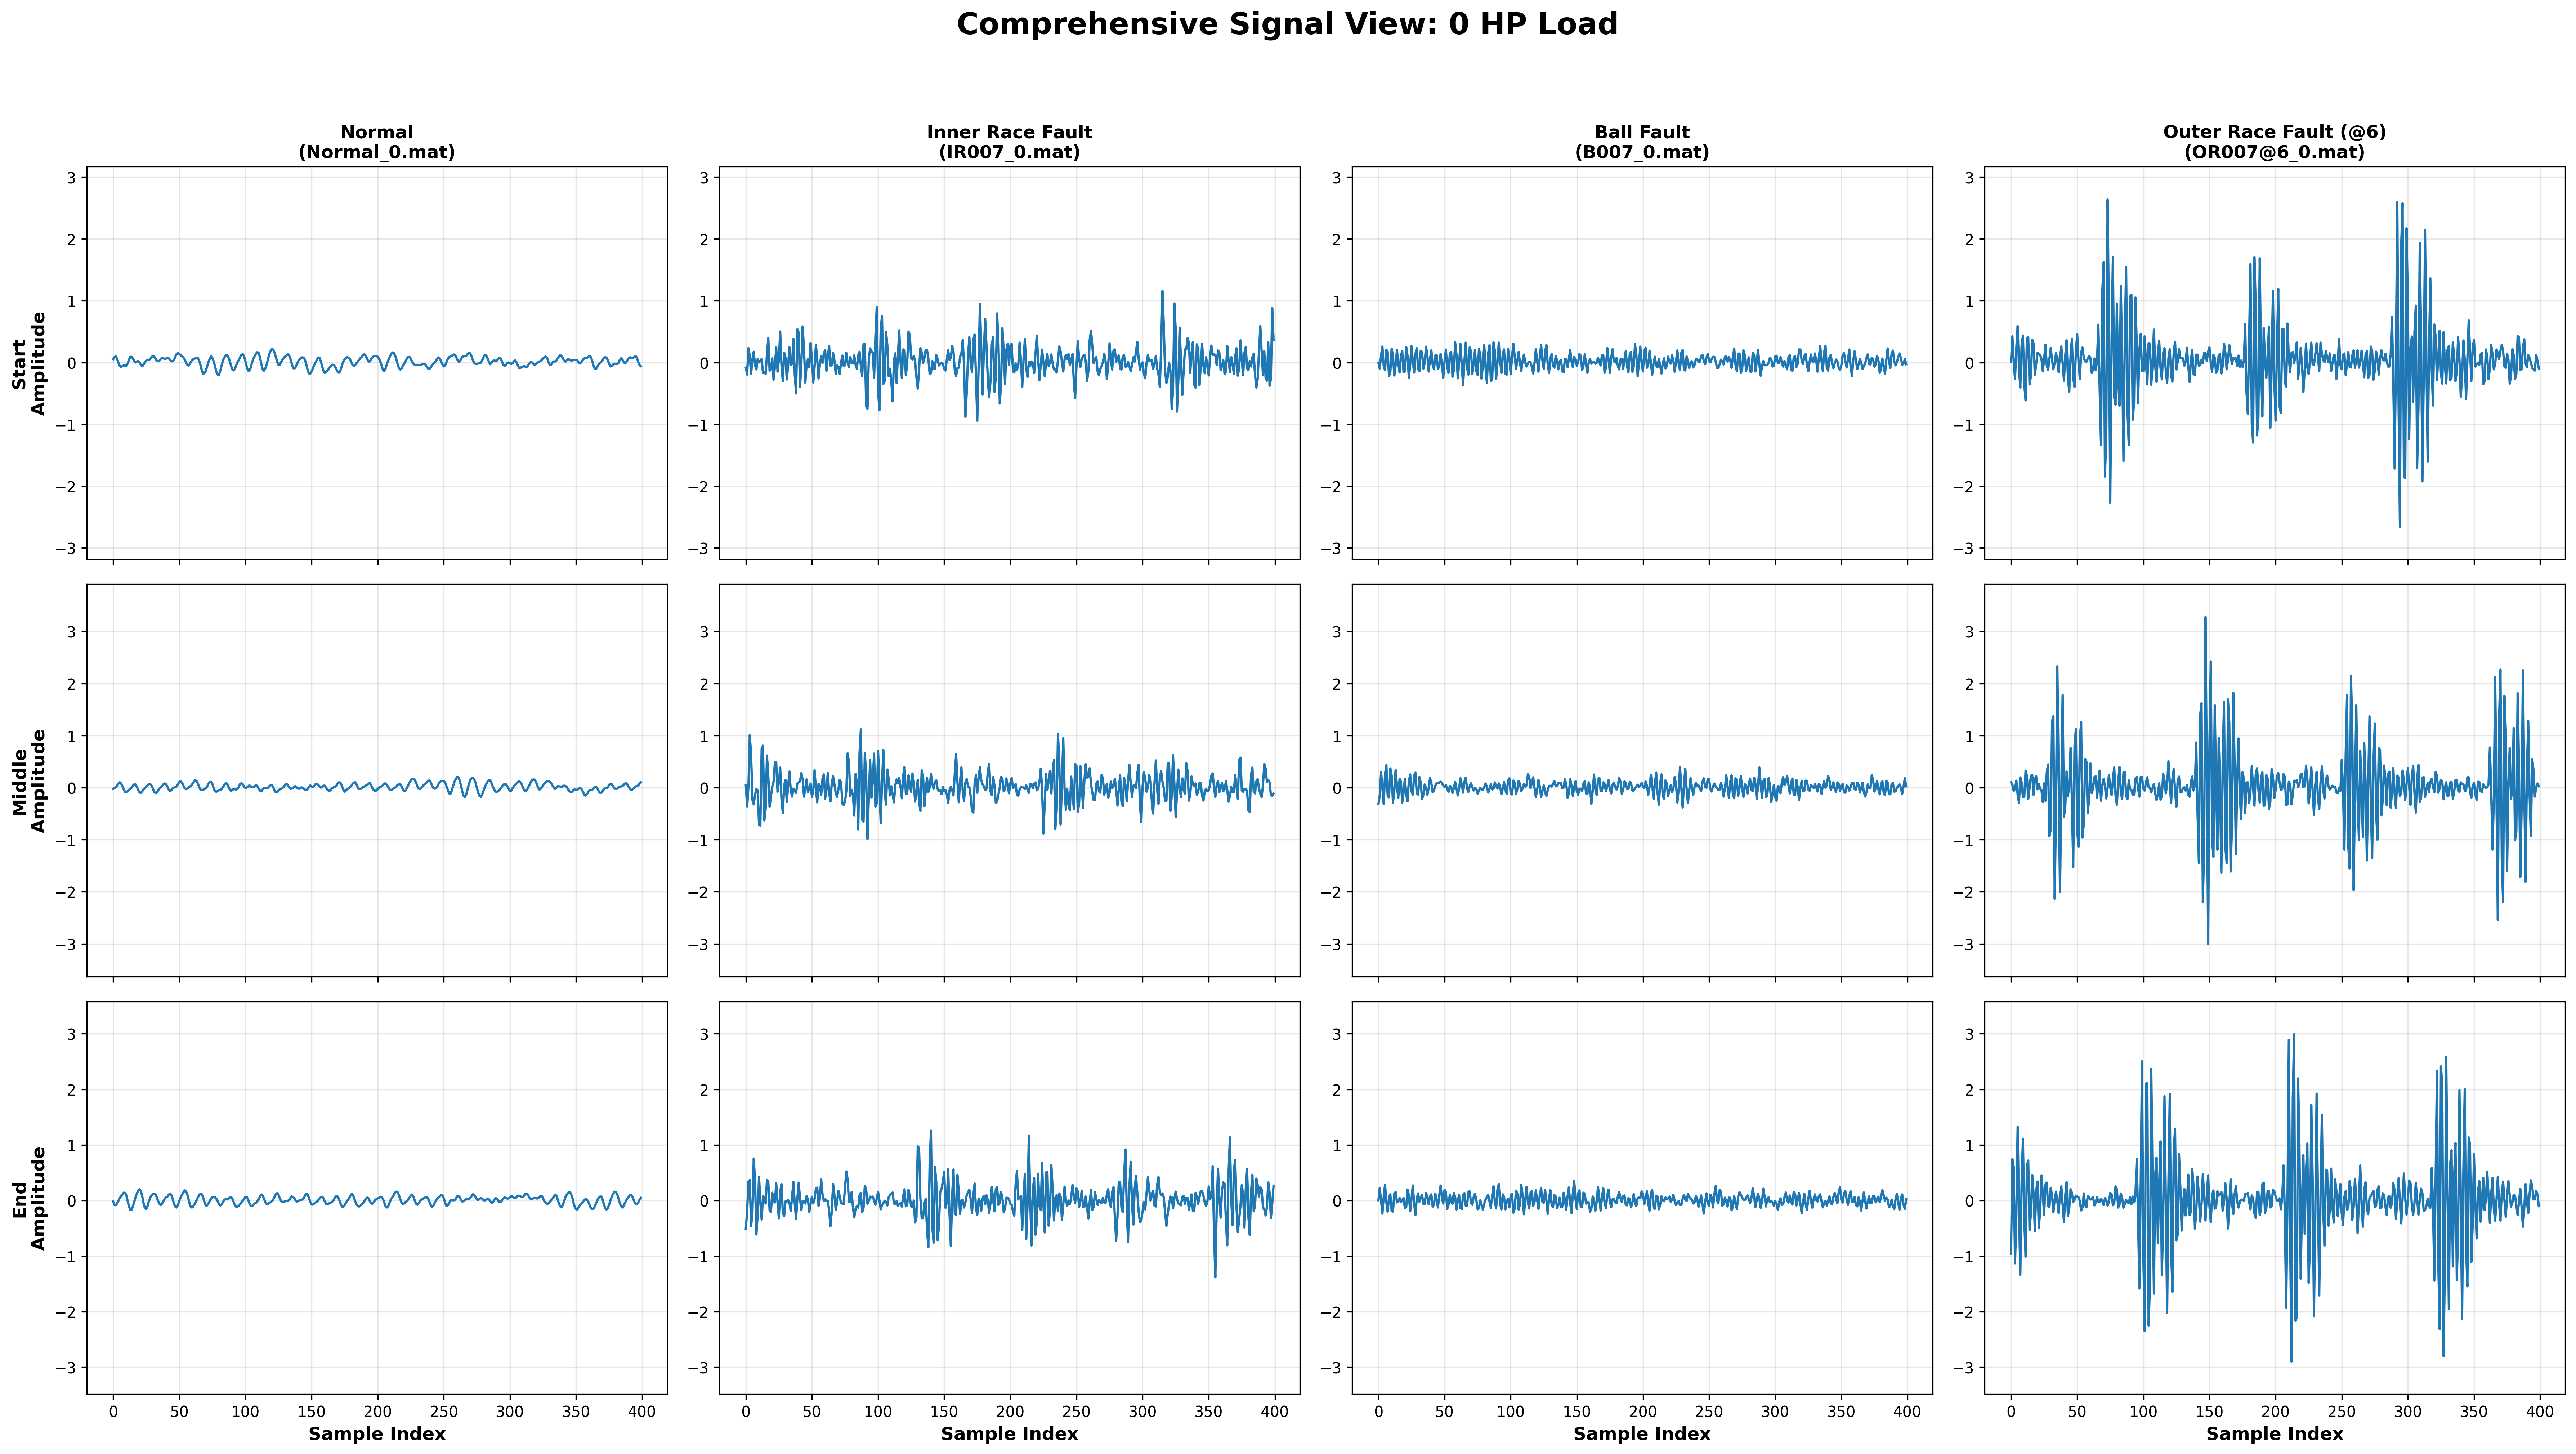

--- Finished compact plot for 0 HP Load ---

--- Processing: 1 HP Load ---
Successfully loaded and processed: Normal_1.mat (RPM: 1772, Samples/Rev: 406)
Successfully loaded and processed: IR007_1.mat (RPM: 1772, Samples/Rev: 406)
Successfully loaded and processed: B007_1.mat (RPM: 1772, Samples/Rev: 406)
Successfully loaded and processed: OR007@6_1.mat (RPM: 1773, Samples/Rev: 406)
High-quality figure saved: ../figures\Bearing_Analysis_1_HP_Load.png


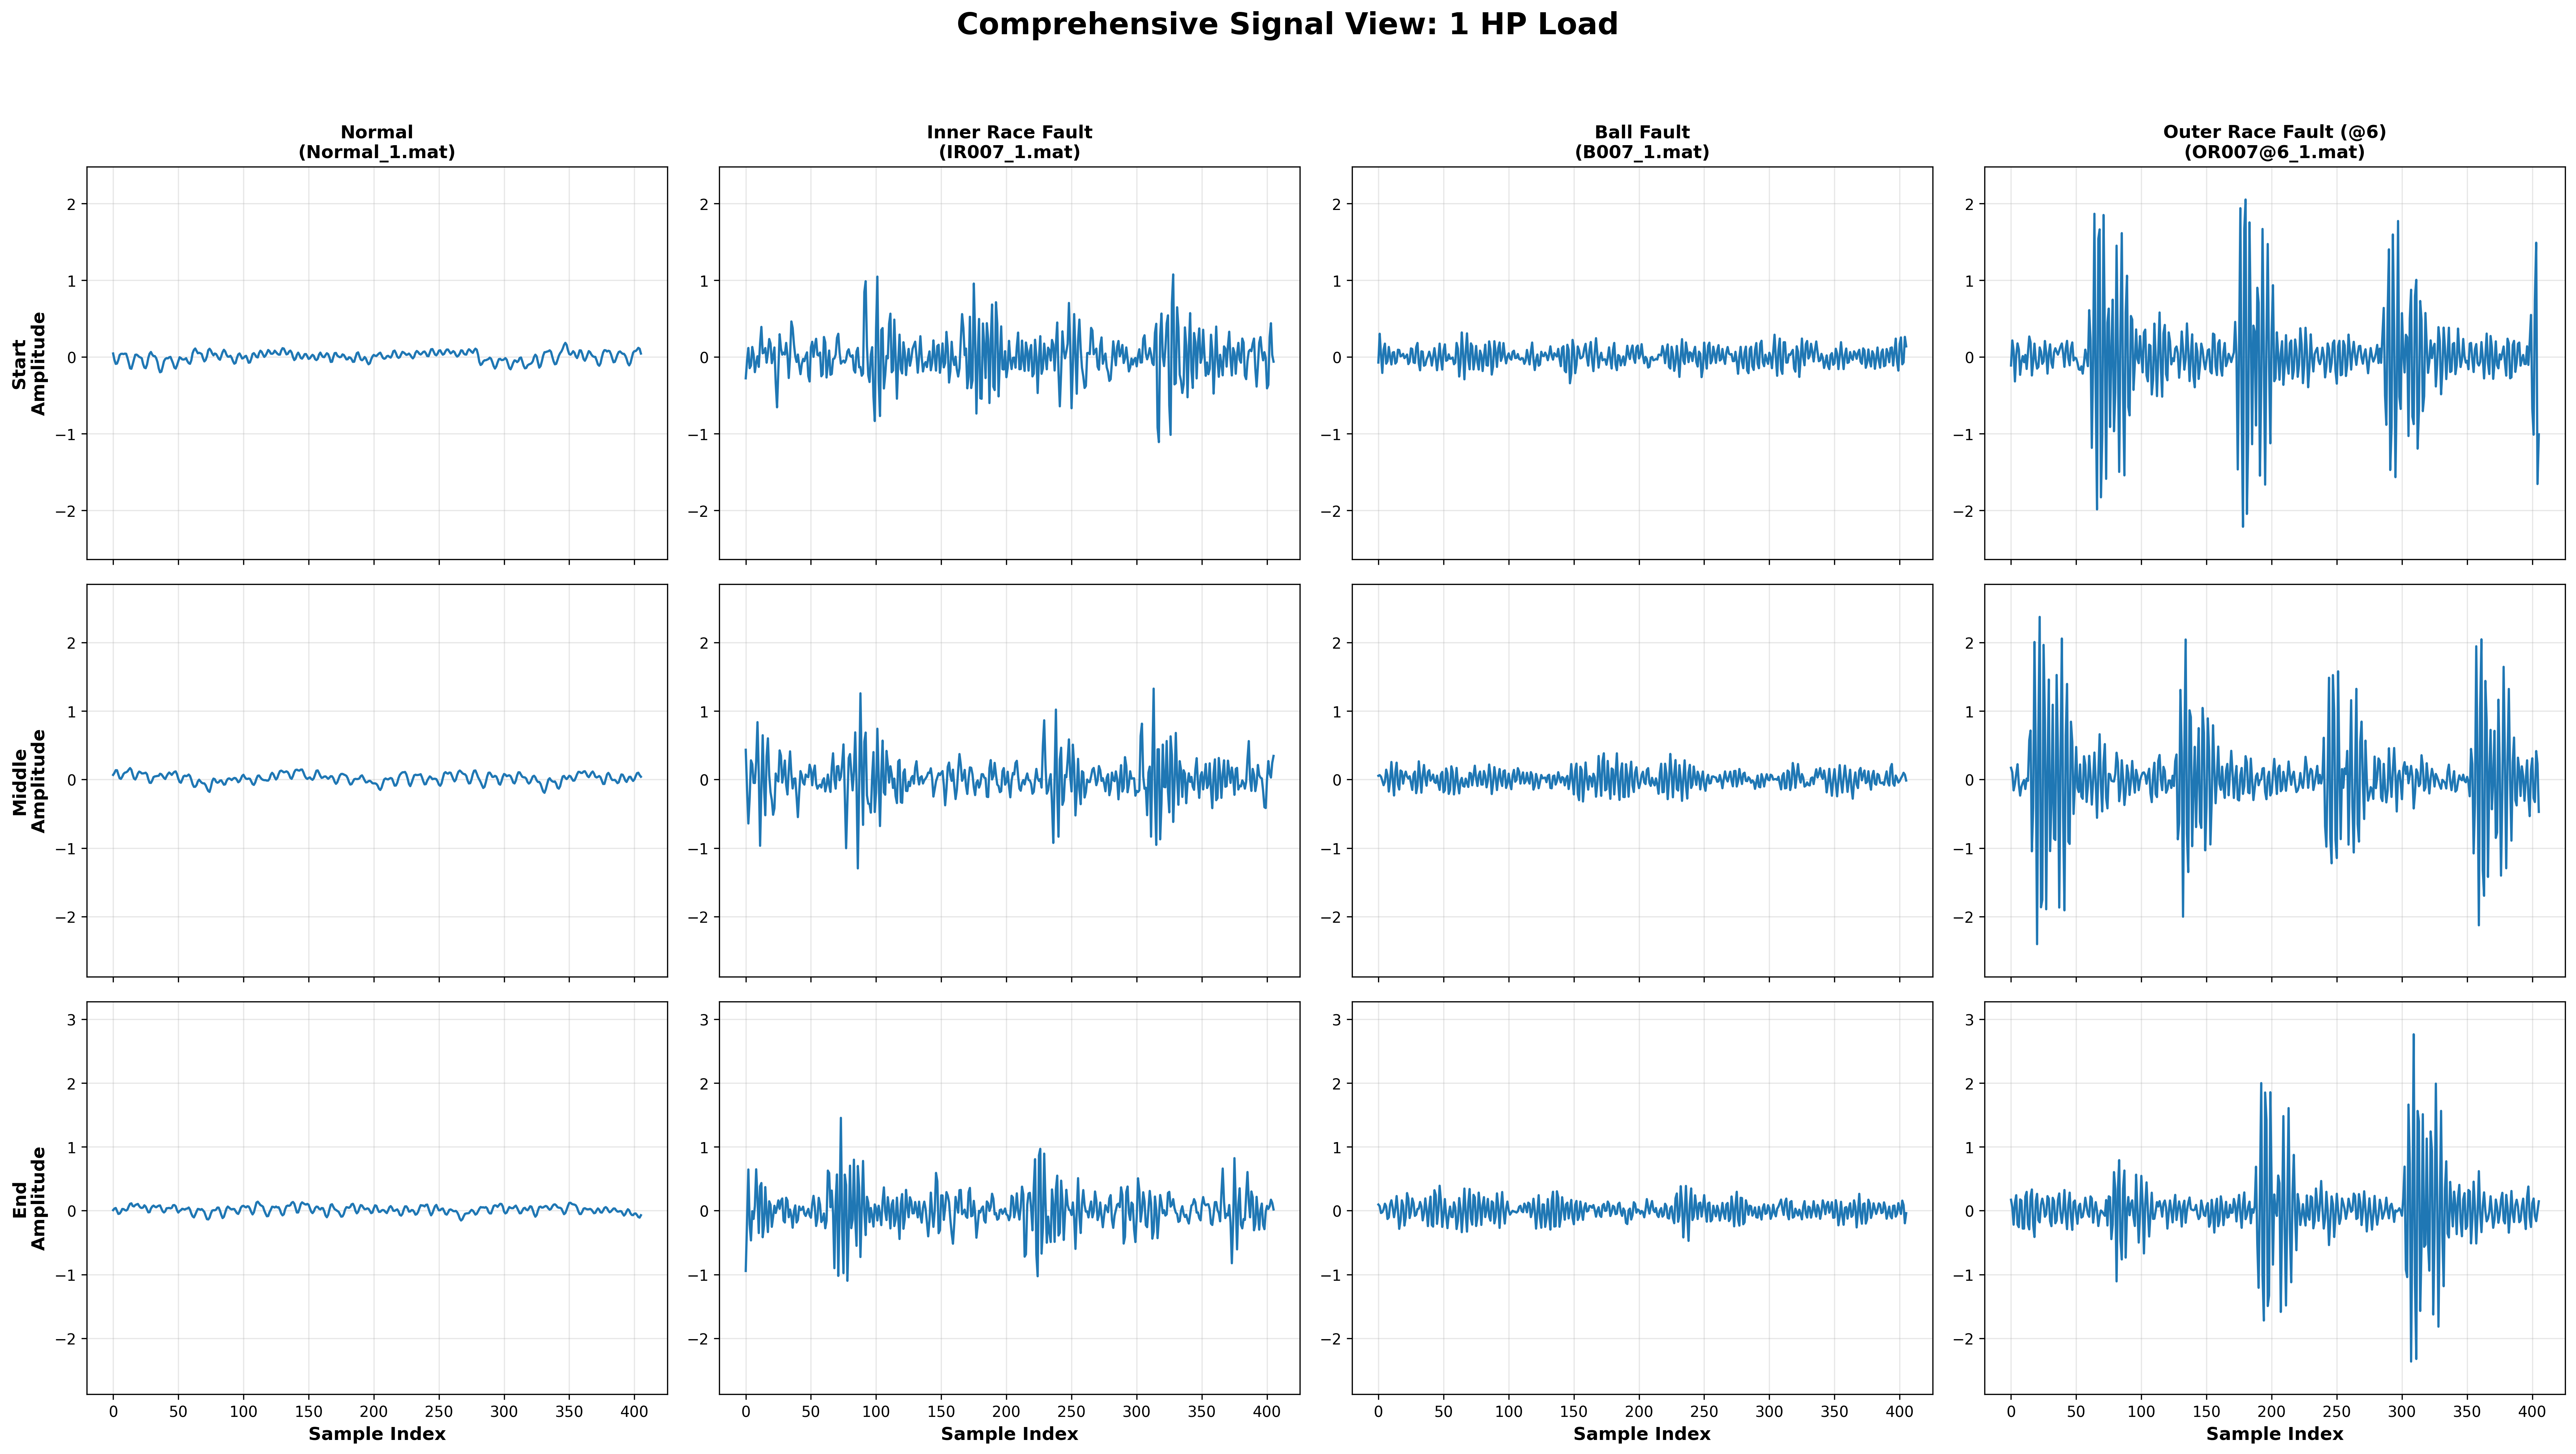

--- Finished compact plot for 1 HP Load ---

--- Processing: 2 HP Load ---
Successfully loaded and processed: Normal_2.mat (RPM: 1750, Samples/Rev: 411)
Successfully loaded and processed: IR007_2.mat (RPM: 1748, Samples/Rev: 411)
Successfully loaded and processed: B007_2.mat (RPM: 1748, Samples/Rev: 411)
Successfully loaded and processed: OR007@6_2.mat (RPM: 1750, Samples/Rev: 411)
High-quality figure saved: ../figures\Bearing_Analysis_2_HP_Load.png


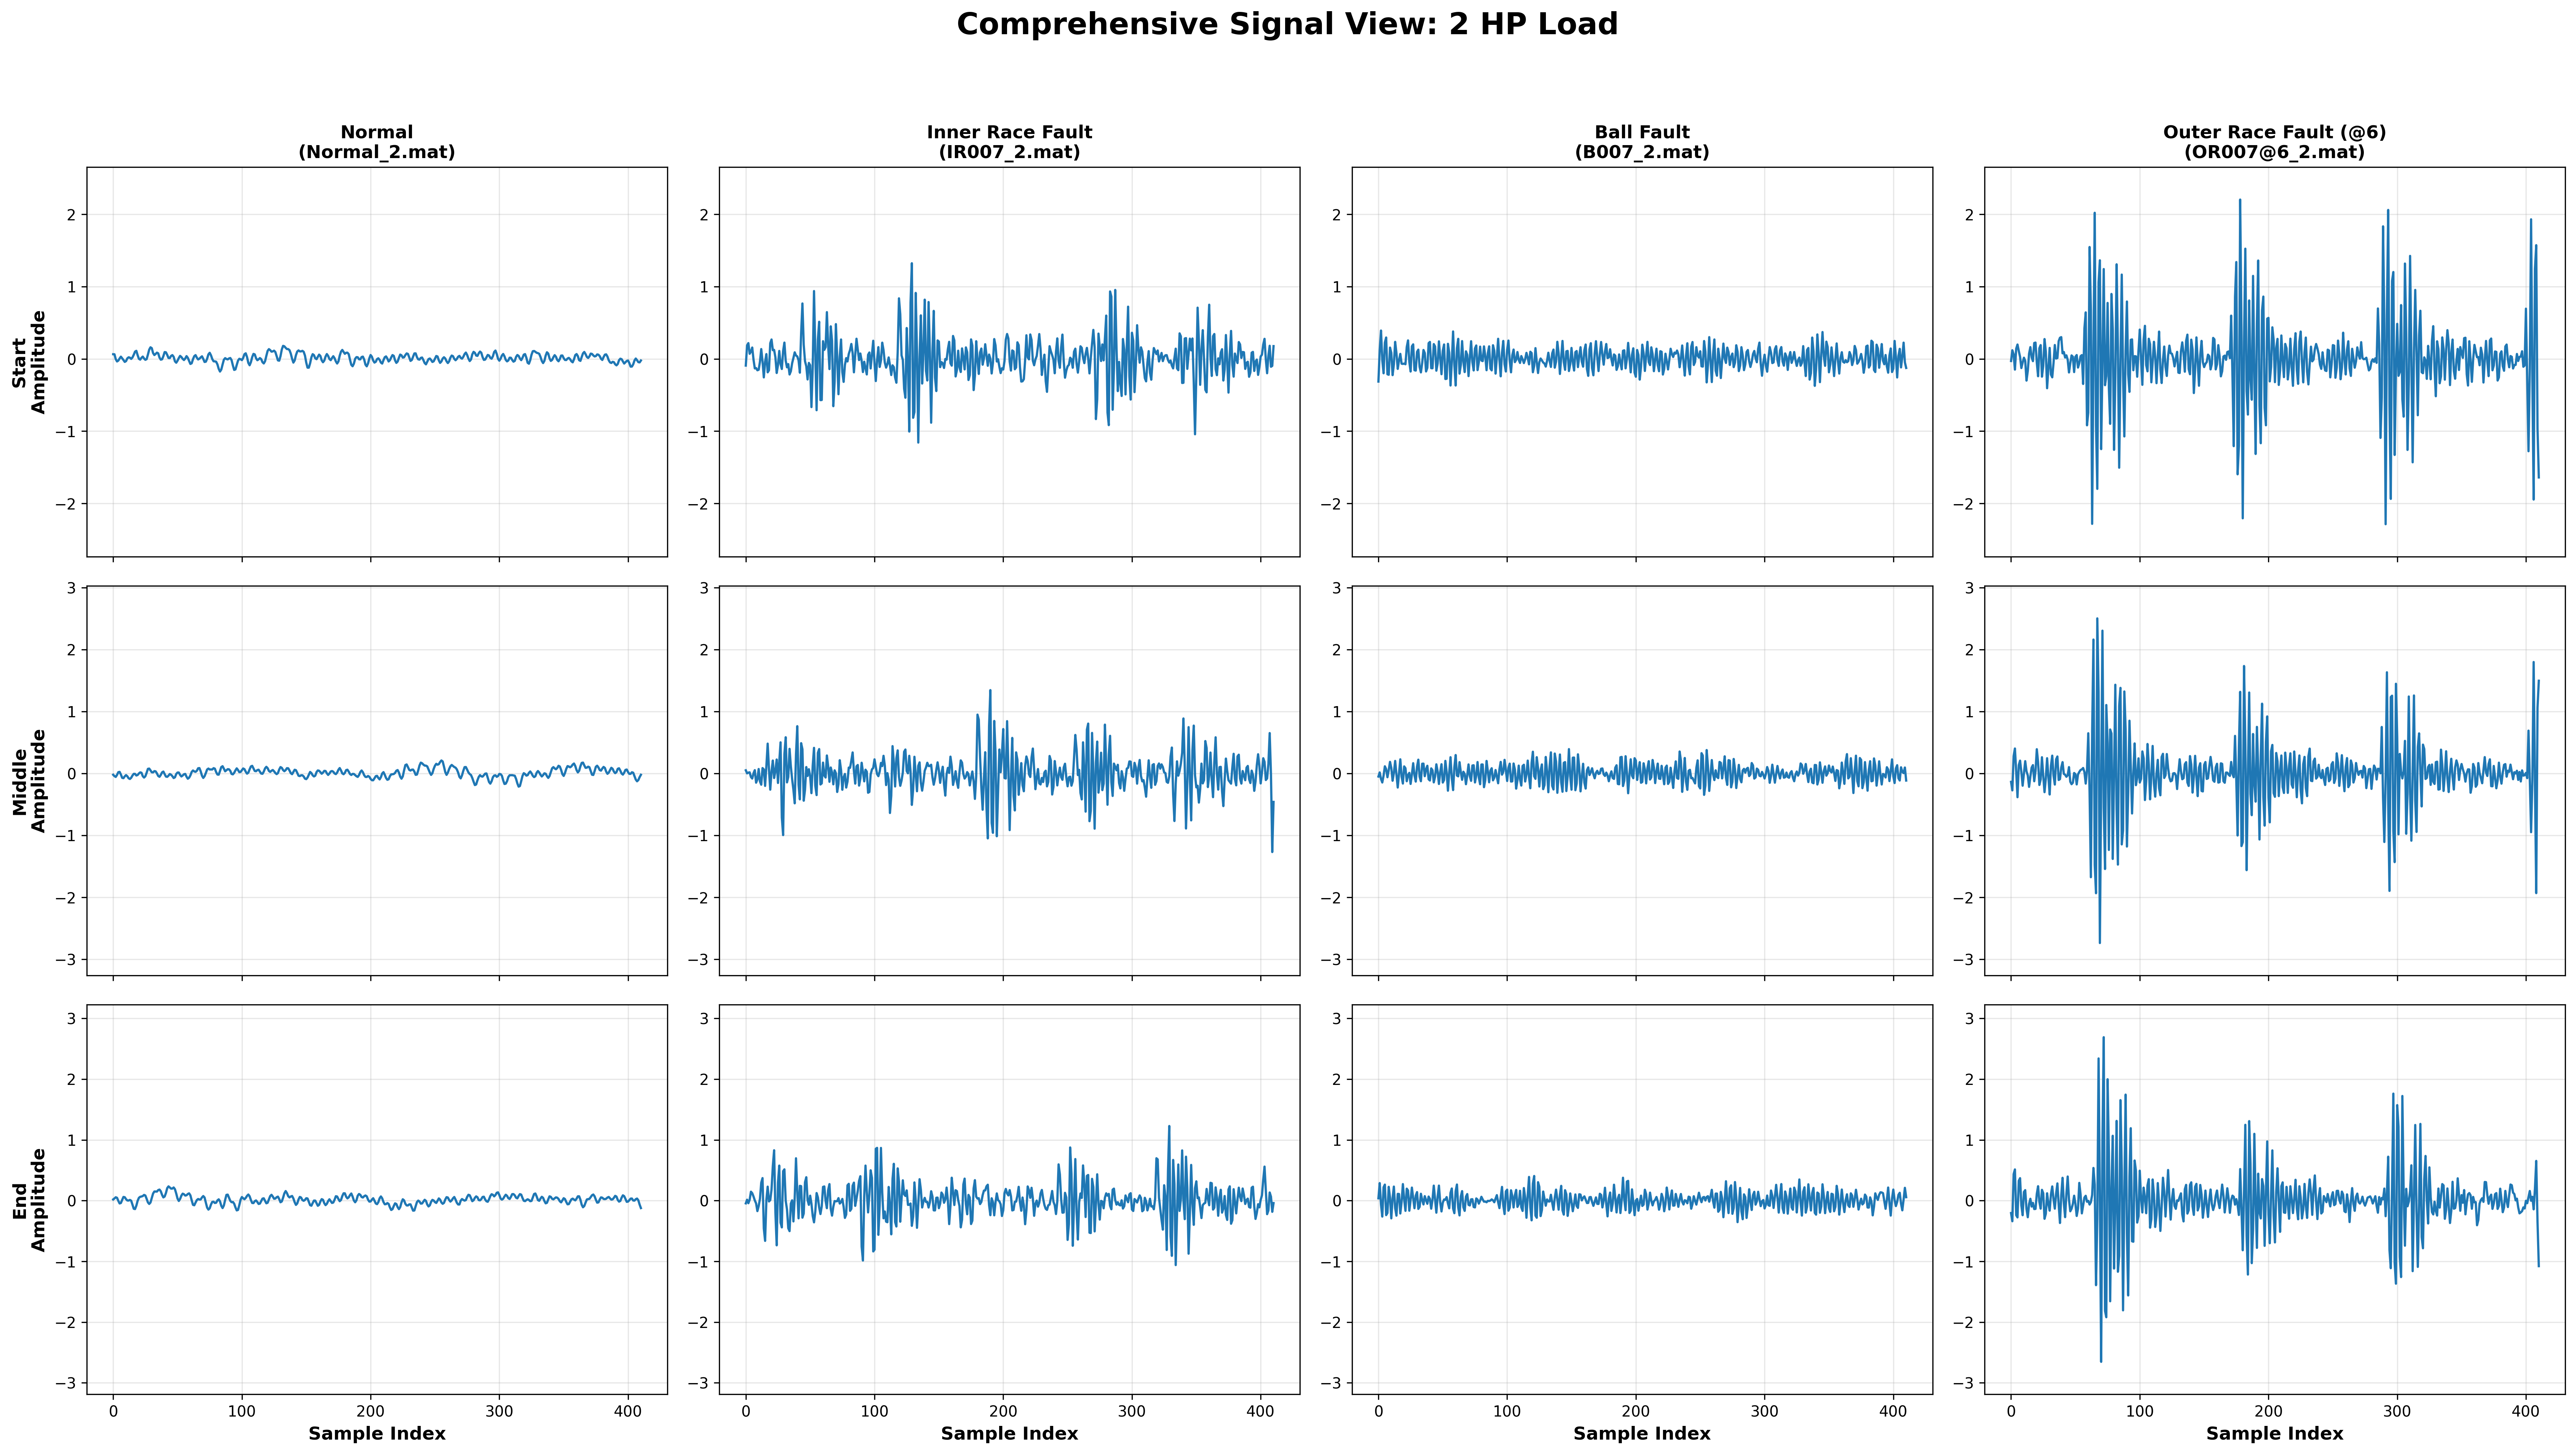

--- Finished compact plot for 2 HP Load ---

--- Compact Comprehensive Plot Generation Complete ---

Saved figures for presentation:
1. Bearing_Analysis_0_HP_Load.png
2. Bearing_Analysis_1_HP_Load.png
3. Bearing_Analysis_2_HP_Load.png

All figures saved in: D:\Coding\GitHub\AI-Bearing-Diagnosis\figures
These high-quality PNG files are ready for your presentation slides!


In [6]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Overall Configuration ---
SAMPLING_RATE = 12000 # Samples per second for 12k CWRU data

# Create output directory for saved figures
OUTPUT_DIR = '../figures'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# --- Data Definitions for each Load Condition (same as before) ---
signals_to_compare_0HP = [
    {'file_name': 'Normal_0.mat', 'signal_key': 'X097_DE_time', 'rpm_key': 'X097RPM', 'label': 'Normal'},
    {'file_name': 'IR007_0.mat',  'signal_key': 'X105_DE_time', 'rpm_key': 'X105RPM', 'label': 'Inner Race Fault'},
    {'file_name': 'B007_0.mat',   'signal_key': 'X118_DE_time', 'rpm_key': 'X118RPM', 'label': 'Ball Fault'},
    {'file_name': 'OR007@6_0.mat','signal_key': 'X130_DE_time', 'rpm_key': 'X130RPM', 'label': 'Outer Race Fault (@6)'}
]
signals_to_compare_1HP = [
    {'file_name': 'Normal_1.mat', 'signal_key': 'X098_DE_time', 'rpm_key': 'X098RPM', 'label': 'Normal'},
    {'file_name': 'IR007_1.mat',  'signal_key': 'X106_DE_time', 'rpm_key': 'X106RPM', 'label': 'Inner Race Fault'},
    {'file_name': 'B007_1.mat',   'signal_key': 'X119_DE_time', 'rpm_key': 'X119RPM', 'label': 'Ball Fault'},
    {'file_name': 'OR007@6_1.mat','signal_key': 'X131_DE_time', 'rpm_key': 'X131RPM', 'label': 'Outer Race Fault (@6)'}
]
signals_to_compare_2HP = [
    {'file_name': 'Normal_2.mat', 'signal_key': 'X099_DE_time', 'rpm_key': 'X099RPM', 'label': 'Normal'},
    {'file_name': 'IR007_2.mat',  'signal_key': 'X107_DE_time', 'rpm_key': 'X107RPM', 'label': 'Inner Race Fault'},
    {'file_name': 'B007_2.mat',   'signal_key': 'X120_DE_time', 'rpm_key': 'X120RPM', 'label': 'Ball Fault'},
    {'file_name': 'OR007@6_2.mat','signal_key': 'X132_DE_time', 'rpm_key': 'X132RPM', 'label': 'Outer Race Fault (@6)'}
]

all_load_conditions_data = [
    {'load_label': "0 HP Load", 'data_list': signals_to_compare_0HP, 'estimated_rpm': 1797},
    {'load_label': "1 HP Load", 'data_list': signals_to_compare_1HP, 'estimated_rpm': 1772},
    {'load_label': "2 HP Load", 'data_list': signals_to_compare_2HP, 'estimated_rpm': 1750}
]

# --- Helper function to load data and RPM (same as before) ---
def load_signal_and_rpm(file_name, signal_key, rpm_key, estimated_rpm_fallback):
    file_path_full = os.path.join('../data/raw', file_name)
    signal_data = None
    rpm_value = None
    try:
        mat_data = scipy.io.loadmat(file_path_full)
        if signal_key in mat_data:
            signal_data = mat_data[signal_key].flatten()
        else:
            print(f"ERROR: Key '{signal_key}' not found in {file_name}. Available keys: {mat_data.keys()}")

        if rpm_key in mat_data:
            rpm_value = mat_data[rpm_key].flatten()[0]
        else:
            rpm_value = estimated_rpm_fallback
            # print(f"Warning: RPM key '{rpm_key}' not found in {file_name}. Using estimated RPM: {rpm_value}")
    except FileNotFoundError:
        print(f"ERROR: File not found at {file_path_full}")
    except Exception as e:
        print(f"ERROR: An error occurred while loading {file_name}: {e}")
    return signal_data, rpm_value

# --- Enhanced function to create and save high-quality figures ---
def create_compact_load_comparison_figure(loaded_signals_details_list, main_title_prefix=""):
    if not loaded_signals_details_list or len(loaded_signals_details_list) != 4:
        print(f"Cannot create plot for {main_title_prefix}: Need data for all 4 signals. Found {len(loaded_signals_details_list)}.")
        return

    # Set high-quality matplotlib parameters
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.titlesize'] = 14
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10

    num_rows = 3  # Start, Middle, End
    num_cols = 4  # Normal, IRF, BF, ORF
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(24, 14))  # Increased size for better quality

    segment_types = ["Start", "Middle", "End"]

    for row_idx, segment_type in enumerate(segment_types):
        # Determine common y-limits for this row (all signals for this segment type)
        min_val_row = float('inf')
        max_val_row = float('-inf')
        avg_samples_per_rev_row = 0

        for col_idx, sig_detail in enumerate(loaded_signals_details_list):
            current_signal = sig_detail['data']
            samples_to_plot_dynamic = sig_detail['samples_per_rev']
            avg_samples_per_rev_row += samples_to_plot_dynamic

            segment_for_ylim = np.array([])
            if segment_type == "Start":
                segment_for_ylim = current_signal[:samples_to_plot_dynamic]
            elif segment_type == "Middle":
                middle_point = len(current_signal) // 2
                start_idx = max(0, middle_point - samples_to_plot_dynamic // 2)
                end_idx = min(len(current_signal), start_idx + samples_to_plot_dynamic)
                segment_for_ylim = current_signal[start_idx:end_idx]
            elif segment_type == "End":
                segment_for_ylim = current_signal[-samples_to_plot_dynamic:]
            
            if segment_for_ylim.size > 0:
                min_val_row = min(min_val_row, np.min(segment_for_ylim))
                max_val_row = max(max_val_row, np.max(segment_for_ylim))
        
        avg_samples_per_rev_row = int(avg_samples_per_rev_row / len(loaded_signals_details_list)) if loaded_signals_details_list else 400
        padding_row = (max_val_row - min_val_row) * 0.1 if (max_val_row - min_val_row) > 0 else 1.0
        common_y_lim_row = (min_val_row - padding_row, max_val_row + padding_row)

        for col_idx, sig_detail in enumerate(loaded_signals_details_list):
            ax = axs[row_idx, col_idx]
            current_signal = sig_detail['data']
            samples_to_plot_dynamic = sig_detail['samples_per_rev']
            
            segment_data_to_plot = np.array([])
            plot_title_suffix = f"(~1 Rev, {samples_to_plot_dynamic} samples)"

            if segment_type == "Start":
                segment_data_to_plot = current_signal[:samples_to_plot_dynamic]
            elif segment_type == "Middle":
                middle_point = len(current_signal) // 2
                start_idx = max(0, middle_point - samples_to_plot_dynamic // 2)
                end_idx = min(len(current_signal), start_idx + samples_to_plot_dynamic)
                segment_data_to_plot = current_signal[start_idx:end_idx]
                plot_title_suffix = f"(~1 Rev from Mid, {len(segment_data_to_plot)} samples)"
            elif segment_type == "End":
                segment_data_to_plot = current_signal[-samples_to_plot_dynamic:]
                plot_title_suffix = f"(~1 Rev from End, {len(segment_data_to_plot)} samples)"

            if segment_data_to_plot.size > 0:
                ax.plot(segment_data_to_plot, linewidth=1.5)  # Slightly thicker lines for presentation
            else:
                ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes)
            
            # Set title only for the top row of subplots to avoid clutter
            if row_idx == 0:
                ax.set_title(f"{sig_detail['label']}\n({sig_detail['file']})", fontsize=12, fontweight='bold')
            
            if col_idx == 0: # Set Y-label only for the first column
                 ax.set_ylabel(f"{segment_type}\nAmplitude", fontsize=12, fontweight='bold')
            
            # Minimal x-labels to avoid clutter, maybe only on bottom row
            if row_idx == num_rows - 1:
                 ax.set_xlabel("Sample Index", fontsize=12, fontweight='bold')
            else:
                 ax.set_xticklabels([])

            ax.grid(True, alpha=0.3)  # More subtle grid for presentation
            if common_y_lim_row[0] != float('inf'):
                 ax.set_ylim(common_y_lim_row)

    fig.suptitle(f"Comprehensive Signal View: {main_title_prefix}", fontsize=20, fontweight='bold', y=0.98)
    plt.tight_layout(rect=[0, 0.02, 1, 0.95])
    
    # Generate filename for saving
    safe_filename = main_title_prefix.replace(" ", "_").replace("(", "").replace(")", "")
    output_path = os.path.join(OUTPUT_DIR, f"Bearing_Analysis_{safe_filename}.png")
    
    # Save with high quality settings
    plt.savefig(output_path, 
                dpi=300, 
                bbox_inches='tight', 
                facecolor='white', 
                edgecolor='none',
                format='png',
                pad_inches=0.2)
    
    print(f"High-quality figure saved: {output_path}")
    
    plt.show()
    plt.close(fig)
    
    # Reset matplotlib parameters to default
    plt.rcdefaults()

# --- Main Loop to Generate All Plots ---
print("--- Starting Compact Comprehensive Plot Generation with High-Quality Saving ---")
print(f"Figures will be saved to: {os.path.abspath(OUTPUT_DIR)}")

saved_figures = []

for load_condition_info in all_load_conditions_data:
    load_label = load_condition_info['load_label']
    current_signal_configs = load_condition_info['data_list']
    estimated_rpm = load_condition_info['estimated_rpm']
    
    print(f"\n--- Processing: {load_label} ---")
    
    loaded_signals_for_condition = []
    all_loaded_successfully = True
    for s_config in current_signal_configs:
        signal, rpm = load_signal_and_rpm(s_config['file_name'], s_config['signal_key'], s_config['rpm_key'], estimated_rpm)
        if signal is not None:
            samples_per_rev = int((SAMPLING_RATE * 60) / rpm) if rpm and rpm > 0 else 400
            loaded_signals_for_condition.append({
                'label': s_config['label'], # This is 'Normal', 'Inner Race Fault' etc.
                'data': signal,
                'file': s_config['file_name'],
                'samples_per_rev': samples_per_rev
            })
            print(f"Successfully loaded and processed: {s_config['file_name']} (RPM: {rpm if rpm else 'N/A'}, Samples/Rev: {samples_per_rev})")
        else:
            print(f"Failed to load: {s_config['file_name']}")
            all_loaded_successfully = False # Mark that not all signals were loaded
            break # Stop processing this load condition if one file fails
            
    if all_loaded_successfully and len(loaded_signals_for_condition) == 4:
        create_compact_load_comparison_figure(loaded_signals_for_condition, main_title_prefix=load_label)
        safe_filename = load_label.replace(" ", "_").replace("(", "").replace(")", "")
        saved_figures.append(f"Bearing_Analysis_{safe_filename}.png")
        print(f"--- Finished compact plot for {load_label} ---")
    else:
        print(f"WARNING: Could not generate compact plot for {load_label} as not all 4 bearing conditions were loaded successfully or processed.")

print("\n--- Compact Comprehensive Plot Generation Complete ---")
print(f"\nSaved figures for presentation:")
for i, fig_name in enumerate(saved_figures, 1):
    print(f"{i}. {fig_name}")
print(f"\nAll figures saved in: {os.path.abspath(OUTPUT_DIR)}")
print("These high-quality PNG files are ready for your presentation slides!")

# Data Windowing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os
from pathlib import Path

# Configuration Class for Better Organization
class PlotConfig:
    """Configuration for high-quality plots"""
    # Plot settings
    DPI = 300
    FIGURE_SIZE = (16, 8)
    FONT_SIZE = 12
    TITLE_SIZE = 16
    SUPTITLE_SIZE = 20
    
    # Color palettes
    FAULT_COLORS = {
        'BF': '#E74C3C',      # Red
        'IRF': '#3498DB',     # Blue  
        'Normal': '#2ECC71',  # Green
        'ORF': '#F39C12'      # Orange
    }
    
    LOAD_COLORS = ['#9B59B6', '#1ABC9C', '#E67E22', '#34495E']  # Purple, Teal, Orange, Dark Blue
    
    # Directories
    RESULTS_DIR = Path('../results')
    FIGURES_DIR = Path('../figures')

def setup_environment():
    """Setup project environment and imports"""
    project_root = Path.cwd().parent.resolve()
    if str(project_root) not in sys.path:
        sys.path.insert(0, str(project_root))
    
    try:
        from src.data_utils import load_and_label_data, segment_signals
        return load_and_label_data, segment_signals
    except ImportError as e:
        print(f"❌ Error importing from src.data_utils: {e}")
        print("Please ensure 'src/data_utils.py' exists and the project structure is correct.")
        raise

def setup_high_quality_plotting():
    """Configure matplotlib and seaborn for high-quality plots"""
    # Set matplotlib parameters
    plt.rcParams.update({
        'figure.dpi': PlotConfig.DPI,
        'savefig.dpi': PlotConfig.DPI,
        'font.size': PlotConfig.FONT_SIZE,
        'axes.titlesize': PlotConfig.TITLE_SIZE,
        'axes.labelsize': PlotConfig.FONT_SIZE,
        'xtick.labelsize': PlotConfig.FONT_SIZE - 1,
        'ytick.labelsize': PlotConfig.FONT_SIZE - 1,
        'legend.fontsize': PlotConfig.FONT_SIZE - 1,
        'figure.titlesize': PlotConfig.SUPTITLE_SIZE,
        'axes.titleweight': 'bold',
        'axes.labelweight': 'bold',
        'figure.facecolor': 'white',
        'axes.facecolor': 'white',
        'savefig.facecolor': 'white',
        'savefig.edgecolor': 'none',
        'grid.alpha': 0.3,
        'axes.grid': True,
        'grid.linewidth': 0.5
    })
    
    # Set seaborn style
    sns.set_style("whitegrid", {
        "axes.spines.left": True,
        "axes.spines.bottom": True,
        "axes.spines.top": False,
        "axes.spines.right": False,
        "grid.color": "#E5E5E5",
        "grid.linewidth": 0.5
    })

def load_and_prepare_data():
    """Load raw data and create segments"""
    print("🔄 Loading and segmenting data...")
    
    load_and_label_data, segment_signals = setup_environment()
    
    # Load raw data
    raw_data_list = load_and_label_data()
    if not raw_data_list:
        raise ValueError("Failed to load raw data. Cannot generate plots.")
    
    # Create DataFrame
    loaded_df = pd.DataFrame(raw_data_list)
    if loaded_df.empty:
        raise ValueError("Loaded DataFrame is empty. Cannot generate plots.")
    
    # Segment the signals
    segmented_df = segment_signals(loaded_df, window_size=2048, overlap_ratio=0.5)
    if segmented_df.empty:
        raise ValueError("No segments were generated. Cannot create plots.")
    
    print(f"✅ Successfully generated {len(segmented_df)} segments.")
    return segmented_df

def create_enhanced_distribution_plots(segmented_df):
    """Create high-quality distribution plots"""
    # Calculate counts
    fault_type_counts = segmented_df['fault_type'].value_counts()
    motor_load_counts = segmented_df['motor_load_hp'].value_counts().sort_index()
    
    # Create figure with simple 1x2 layout (removed statistics box)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=PlotConfig.FIGURE_SIZE)
    
    # --- Subplot 1: Fault Type Distribution ---
    fault_colors = [PlotConfig.FAULT_COLORS.get(fault, '#7F8C8D') for fault in fault_type_counts.index]
    
    bars1 = ax1.bar(fault_type_counts.index, fault_type_counts.values, 
                    color=fault_colors, alpha=0.8, edgecolor='black', linewidth=1.2)
    
    ax1.set_title('Segment Distribution by Fault Type', fontweight='bold', pad=25)
    ax1.set_xlabel('Fault Type', fontweight='bold')
    ax1.set_ylabel('Number of Segments', fontweight='bold')
    
    # Add value labels on bars - positioned properly above bars
    max_height = max(fault_type_counts.values)
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + max_height * 0.02,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    # Add percentage labels - positioned in middle of bars
    total_segments = fault_type_counts.sum()
    for bar in bars1:
        height = bar.get_height()
        percentage = (height / total_segments) * 100
        ax1.text(bar.get_x() + bar.get_width()/2., height * 0.5,
                f'{percentage:.1f}%', ha='center', va='center', 
                fontweight='bold', color='white', fontsize=11)
    
    # Set y-axis limit to accommodate labels
    ax1.set_ylim(0, max_height * 1.1)
    
    # --- Subplot 2: Motor Load Distribution ---
    load_labels = [f'{int(load)} HP' for load in motor_load_counts.index]
    bars2 = ax2.bar(load_labels, motor_load_counts.values,
                    color=PlotConfig.LOAD_COLORS[:len(motor_load_counts)], 
                    alpha=0.8, edgecolor='black', linewidth=1.2)
    
    ax2.set_title('Segment Distribution by Motor Load', fontweight='bold', pad=25)
    ax2.set_xlabel('Motor Load (HP)', fontweight='bold')
    ax2.set_ylabel('Number of Segments', fontweight='bold')
    
    # Add value labels on bars - positioned properly above bars
    max_height_load = max(motor_load_counts.values)
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + max_height_load * 0.02,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    # Add percentage labels - positioned in middle of bars
    for bar in bars2:
        height = bar.get_height()
        percentage = (height / total_segments) * 100
        ax2.text(bar.get_x() + bar.get_width()/2., height * 0.5,
                f'{percentage:.1f}%', ha='center', va='center', 
                fontweight='bold', color='white', fontsize=11)
    
    # Set y-axis limit to accommodate labels
    ax2.set_ylim(0, max_height_load * 1.1)
    
    # Add main title with proper spacing
    fig.suptitle('Bearing Fault Segment Distribution Analysis', 
                fontsize=PlotConfig.SUPTITLE_SIZE, fontweight='bold', y=0.95)
    
    # Adjust layout to prevent overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    
    return fig

# Removed create_statistics_summary function as it's no longer needed

def save_plots(fig, base_filename='segment_distribution_analysis'):
    """Save plots to multiple directories with different formats"""
    saved_files = []
    
    # Create directories if they don't exist
    PlotConfig.RESULTS_DIR.mkdir(exist_ok=True)
    PlotConfig.FIGURES_DIR.mkdir(exist_ok=True)
    
    # Save formats
    formats = {
        'png': {'dpi': PlotConfig.DPI, 'bbox_inches': 'tight'},
        'pdf': {'bbox_inches': 'tight'},
        'svg': {'bbox_inches': 'tight'}
    }
    
    for fmt, kwargs in formats.items():
        try:
            # Save to results directory
            results_path = PlotConfig.RESULTS_DIR / f"{base_filename}.{fmt}"
            fig.savefig(results_path, format=fmt, **kwargs)
            saved_files.append(results_path)
            
            # Save to figures directory
            figures_path = PlotConfig.FIGURES_DIR / f"{base_filename}.{fmt}"
            fig.savefig(figures_path, format=fmt, **kwargs)
            saved_files.append(figures_path)
            
        except Exception as e:
            print(f"⚠️  Warning: Could not save {fmt} format: {e}")
    
    return saved_files

def create_detailed_summary_table(segmented_df):
    """Create a detailed summary table"""
    print("\n" + "="*70)
    print("              SEGMENT DISTRIBUTION SUMMARY")
    print("="*70)
    
    # Cross-tabulation
    cross_tab = pd.crosstab(segmented_df['fault_type'], segmented_df['motor_load_hp'], 
                           margins=True, margins_name='Total')
    cross_tab.columns = [f'{int(col)} HP' if col != 'Total' else 'Total' 
                        for col in cross_tab.columns]
    
    print("\nSegments by Fault Type and Motor Load:")
    print(cross_tab.to_string())
    
    # Percentage distribution
    print("\nPercentage Distribution:")
    fault_percentages = segmented_df['fault_type'].value_counts(normalize=True) * 100
    load_percentages = segmented_df['motor_load_hp'].value_counts(normalize=True) * 100
    
    for fault, pct in fault_percentages.items():
        print(f"{fault}: {pct:.1f}%")
    
    print(f"\nTotal Segments: {len(segmented_df):,}")
    print("="*70)

def main():
    """Main execution function"""
    try:
        # Setup
        setup_high_quality_plotting()
        
        # Load and prepare data
        segmented_df = load_and_prepare_data()
        
        # Create detailed summary
        create_detailed_summary_table(segmented_df)
        
        # Create plots
        print("\n🎨 Creating enhanced distribution plots...")
        fig = create_enhanced_distribution_plots(segmented_df)
        
        # Save plots
        print("💾 Saving plots...")
        saved_files = save_plots(fig)
        
        # Display results
        print(f"\n✅ Analysis complete! Plots saved to:")
        for file_path in saved_files:
            print(f"   📁 {file_path}")
        
        # Show plot
        plt.show()
        
    except Exception as e:
        print(f"❌ Error during analysis: {e}")
        raise
    finally:
        # Reset matplotlib parameters
        plt.rcdefaults()

# Execute the analysis
if __name__ == "__main__":
    main()
else:
    # If running in notebook, execute directly
    main()

# Load the Segmented Data

In [7]:
# In a new cell in 02_preprocessing_feature_engineering_and_augmentation.ipynb

import pandas as pd
import numpy as np
import sys
import os
from sklearn.model_selection import train_test_split

# Add the project root to the Python path to allow importing from 'src'
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

try:
    from src.data_utils import load_and_label_data, segment_signals
except ImportError as e:
    print(f"Error importing from src.data_utils: {e}")
    # Handle error or guide user
    raise

# 1. Load the raw data
print("Loading raw data...")
raw_data_list = load_and_label_data() # This calls functions from your data_utils
if not raw_data_list:
    raise ValueError("Failed to load raw data. Check src/data_utils.py and data paths.")
loaded_df = pd.DataFrame(raw_data_list)
print(f"Loaded {len(loaded_df)} raw signals.")

# 2. Segment the loaded signals
WINDOW_SIZE = 2048
OVERLAP_RATIO = 0.5
print(f"Segmenting signals (Window: {WINDOW_SIZE}, Overlap: {OVERLAP_RATIO*100}%)...")
segmented_df = segment_signals(loaded_df, window_size=WINDOW_SIZE, overlap_ratio=OVERLAP_RATIO)
if segmented_df.empty:
    raise ValueError("Segmentation resulted in an empty DataFrame. Check parameters.")
print(f"Generated {len(segmented_df)} segments.")
print("Segmented DataFrame head:\n", segmented_df.head())

Loading raw data...
Successfully loaded and processed: Normal_0.mat
Successfully loaded and processed: IR007_0.mat
Successfully loaded and processed: B007_0.mat
Successfully loaded and processed: OR007@6_0.mat
Info: Using expected_rpm (1772) for Normal_1.mat.
Successfully loaded and processed: Normal_1.mat
Successfully loaded and processed: IR007_1.mat
Successfully loaded and processed: B007_1.mat
Successfully loaded and processed: OR007@6_1.mat
Info: Using expected_rpm (1750) for Normal_2.mat.
Successfully loaded and processed: Normal_2.mat
Successfully loaded and processed: IR007_2.mat
Successfully loaded and processed: B007_2.mat
Successfully loaded and processed: OR007@6_2.mat
Loaded 12 raw signals.
Segmenting signals (Window: 2048, Overlap: 50.0%)...
Generated 2238 segments.
Segmented DataFrame head:
   config_name original_filename fault_type  motor_load_hp     rpm  \
0  Normal_0HP      Normal_0.mat     Normal              0  1796.0   
1  Normal_0HP      Normal_0.mat     Normal  

# Split Data into Training/Validation and Test Sets

In [8]:
# In a new cell

# Separate the test set (2 HP load conditions)
test_df = segmented_df[segmented_df['motor_load_hp'] == 2].copy()
print(f"Test set size (2 HP data): {len(test_df)} segments")

# Pool for training and validation (0 HP and 1 HP load conditions)
train_val_pool_df = segmented_df[segmented_df['motor_load_hp'].isin([0, 1])].copy()
print(f"Training+Validation pool size (0 HP + 1 HP data): {len(train_val_pool_df)} segments")

# Check if any data was lost
if len(test_df) + len(train_val_pool_df) != len(segmented_df):
    print("Warning: Mismatch in segment counts during train/test split!")

# At this point, 'test_df' is your test set.
# 'train_val_pool_df' needs to be split into training and validation sets.

Test set size (2 HP data): 824 segments
Training+Validation pool size (0 HP + 1 HP data): 1414 segments


# Split Training+Validation Pool into Training and Validation Sets

In [9]:
# In a new cell

# Define features (X) and target (y) for the train_val_pool
# The 'signal_segment' is our feature, and 'fault_type' is our primary target.
X_train_val = np.stack(train_val_pool_df['signal_segment'].values) # Stack segments into a NumPy array
y_train_val = train_val_pool_df['fault_type'].values

# Perform the split (e.g., 80% train, 20% validation)
# random_state ensures reproducibility
# stratify by y_train_val to maintain class proportions
TRAIN_SPLIT_RATIO = 0.8 # 80% for training
VAL_SPLIT_RATIO = 1 - TRAIN_SPLIT_RATIO # 20% for validation

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, 
    y_train_val, 
    test_size=VAL_SPLIT_RATIO, 
    random_state=42, # For reproducibility
    stratify=y_train_val 
)

print(f"Training set shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Validation set shape: X_val = {X_val.shape}, y_val = {y_val.shape}")

# Prepare the test set features and labels
X_test = np.stack(test_df['signal_segment'].values)
y_test = test_df['fault_type'].values
print(f"Test set shape: X_test = {X_test.shape}, y_test = {y_test.shape}")

print("\nDistribution of fault types in training set:")
print(pd.Series(y_train).value_counts(normalize=True).sort_index())
print("\nDistribution of fault types in validation set:")
print(pd.Series(y_val).value_counts(normalize=True).sort_index())
print("\nDistribution of fault types in test set:")
print(pd.Series(y_test).value_counts(normalize=True).sort_index())

Training set shape: X_train = (1131, 2048), y_train = (1131,)
Validation set shape: X_val = (283, 2048), y_val = (283,)
Test set shape: X_test = (824, 2048), y_test = (824,)

Distribution of fault types in training set:
BF        0.166225
IRF       0.166225
Normal    0.500442
ORF       0.167109
Name: proportion, dtype: float64

Distribution of fault types in validation set:
BF        0.166078
IRF       0.166078
Normal    0.501767
ORF       0.166078
Name: proportion, dtype: float64

Distribution of fault types in test set:
BF        0.141990
IRF       0.143204
Normal    0.572816
ORF       0.141990
Name: proportion, dtype: float64
